# PROYECTO INTREGRADOR M4

## Avance 1

In [1]:
#Cargue de librerias
import numpy as np
import pandas as pd

In [2]:
# Se carga el archivo
data=pd.read_csv("data_latinoamerica.csv",sep=',')

In [3]:
# Revisión de encabezados

data.head()

location_key        date country_code country_name  new_confirmed  \
0           AR  2020-01-01           AR    Argentina            3.0   
1           AR  2020-01-02           AR    Argentina           14.0   
2           AR  2020-01-03           AR    Argentina            3.0   
3           AR  2020-01-04           AR    Argentina            7.0   
4           AR  2020-01-05           AR    Argentina            5.0   

   new_deceased  cumulative_confirmed  cumulative_deceased  \
0           0.0                   3.0                  0.0   
1           0.0                  17.0                  0.0   
2           0.0                  20.0                  0.0   
3           0.0                  27.0                  0.0   
4           0.0                  32.0                  0.0   

   cumulative_vaccine_doses_administered  population  ...  \
0                                    NaN  44938712.0  ...   
1                                    NaN  44938712.0  ...   
2                                    NaN  44938712.0  ...   
3                                    NaN  44938712.0  ...   
4                                    NaN  44938712.0  ...   

   population_largest_city  area_rural_sq_km  area_urban_sq_km  \
0               15057273.0         2690269.0           55032.0   
1               15057273.0         2690269.0           55032.0   
2               15057273.0         2690269.0           55032.0   
3               15057273.0         2690269.0           55032.0   
4               15057273.0         2690269.0           55032.0   

   life_expectancy  adult_male_mortality_rate  adult_female_mortality_rate  \
0            76.52                    147.086                       79.483   
1            76.52                    147.086                       79.483   
2            76.52                    147.086                       79.483   
3            76.52                    147.086                       79.483   
4            76.52                    147.086                       79.483   

   pollution_mortality_rate  comorbidity_mortality_rate  new_recovered  \
0                      26.6                        15.8            NaN   
1                      26.6                        15.8            NaN   
2                      26.6                        15.8            NaN   
3                      26.6                        15.8            NaN   
4                      26.6                        15.8            NaN   

   cumulative_recovered  
0                   NaN  
1                   NaN  
2                   NaN  
3                   NaN  
4                   NaN  

[5 rows x 50 columns]

In [4]:
#Revisión de cantidad de datos
data.shape

(12216057, 50)

In [6]:
# Procedemos a la selección de los siguientes paises solicitados para el análisis

paises_seleccionados=['Argentina','Chile','Colombia','Mexico','Peru','Brazil']
data_latinoamerica=data[data['country_name'].isin(paises_seleccionados)]

 


In [7]:
# Revisión nuevamente de cantidad
data_latinoamerica.shape

(11970289, 50)

In [9]:
# Se procede a la revisión de los valores faltantes por columna
data_latinoamerica.isnull().sum()[data_latinoamerica.isnull().sum()>4000000]

new_confirmed                             5620283
new_deceased                              5661788
cumulative_confirmed                      5619937
cumulative_deceased                       5661426
cumulative_vaccine_doses_administered    11706131
population_rural                         11964343
population_urban                         11964343
population_density                       11964343
human_development_index                   6472221
gdp_usd                                  11963352
gdp_per_capita_usd                       11962361
smoking_prevalence                       11964343
diabetes_prevalence                      11964343
infant_mortality_rate                    11964343
nurses_per_1000                          11964343
physicians_per_1000                      11964343
population_largest_city                  11964343
area_rural_sq_km                         11964343
area_urban_sq_km                         11964343
life_expectancy                          11964343


In [10]:
#Procedemos a realizar un conteo de valores únicos
data_latinoamerica.location_key.value_counts()

location_key
AR              991
MX_GRO_12040    991
MX_GRO_12031    991
MX_GRO_12032    991
MX_GRO_12033    991
               ... 
BR_PR_411880    991
BR_PR_411885    991
BR_PR_411890    991
BR_PR_411900    991
PE_UCA_0401     991
Name: count, Length: 12079, dtype: int64

In [12]:
# Se verifica que hay demasiados valores faltantes , por lo cual se va realizar un filtro donde se saquen a las regiones y subregiones y se dejen solo los respectivos paises

data_latinoamerica_paises=data_latinoamerica[data_latinoamerica['location_key'].isin(['AR','CL','CO','MX','PE','BR'])]
data_latinoamerica_paises.shape

(5946, 50)

In [14]:
# Filtrado por fecha

data_latinoamerica_paises_fecha=data_latinoamerica_paises[data_latinoamerica_paises['date']>'2021-01-01']
data_latinoamerica_paises_fecha.shape

(3744, 50)

In [18]:
#Revisión de valores nulos
valores_nulos=data_latinoamerica_paises_fecha.isnull().sum()[data_latinoamerica_paises_fecha.isnull().sum()>0]
print(valores_nulos)
data_latinoamerica_paises_fecha.shape

new_confirmed                              21
new_deceased                               21
cumulative_confirmed                       21
cumulative_deceased                        21
cumulative_vaccine_doses_administered     584
average_temperature_celsius                42
minimum_temperature_celsius                41
maximum_temperature_celsius                41
rainfall_mm                                90
relative_humidity                          42
new_recovered                            2116
cumulative_recovered                     2736
dtype: int64


(3744, 50)

In [26]:
# Se procede a usar un for para rellenar los valores nulos con la media de cada pais

for pais in paises_seleccionados:
    data_latinoamerica_paises_fecha['new_confirmed']=data_latinoamerica_paises_fecha['new_confirmed'].fillna(data_latinoamerica_paises_fecha[data_latinoamerica_paises_fecha['country_name']==pais]['new_confirmed'].mean())
    data_latinoamerica_paises_fecha['new_deceased']=data_latinoamerica_paises_fecha['new_deceased'].fillna(data_latinoamerica_paises_fecha[data_latinoamerica_paises_fecha['country_name']==pais]['new_deceased'].mean())
    data_latinoamerica_paises_fecha['cumulative_confirmed']=data_latinoamerica_paises_fecha['cumulative_confirmed'].fillna(data_latinoamerica_paises_fecha[data_latinoamerica_paises_fecha['country_name']==pais]['cumulative_confirmed'].mean())
    data_latinoamerica_paises_fecha['cumulative_deceased']=data_latinoamerica_paises_fecha['cumulative_deceased'].fillna(data_latinoamerica_paises_fecha[data_latinoamerica_paises_fecha['country_name']==pais]['cumulative_deceased'].mean())
    data_latinoamerica_paises_fecha['average_temperature_celsius']=data_latinoamerica_paises_fecha['average_temperature_celsius'].fillna(data_latinoamerica_paises_fecha[data_latinoamerica_paises_fecha['country_name']==pais]['average_temperature_celsius'].mean())
    data_latinoamerica_paises_fecha['minimum_temperature_celsius']=data_latinoamerica_paises_fecha['minimum_temperature_celsius'].fillna(data_latinoamerica_paises_fecha[data_latinoamerica_paises_fecha['country_name']==pais]['minimum_temperature_celsius'].mean())
    data_latinoamerica_paises_fecha['maximum_temperature_celsius']=data_latinoamerica_paises_fecha['maximum_temperature_celsius'].fillna(data_latinoamerica_paises_fecha[data_latinoamerica_paises_fecha['country_name']==pais]['maximum_temperature_celsius'].mean())
    data_latinoamerica_paises_fecha['rainfall_mm']=data_latinoamerica_paises_fecha['rainfall_mm'].fillna(data_latinoamerica_paises_fecha[data_latinoamerica_paises_fecha['country_name']==pais]['rainfall_mm'].mean())
    data_latinoamerica_paises_fecha['relative_humidity']=data_latinoamerica_paises_fecha['relative_humidity'].fillna(data_latinoamerica_paises_fecha[data_latinoamerica_paises_fecha['country_name']==pais]['relative_humidity'].mean())

    #Se llena el valor Nan con 0 en estas columnas para realizar el análisis
    data_latinoamerica_paises_fecha['cumulative_vaccine_doses_administered']=data_latinoamerica_paises_fecha['cumulative_vaccine_doses_administered'].fillna(0)
    data_latinoamerica_paises_fecha['new_recovered']=data_latinoamerica_paises_fecha['new_recovered'].fillna(0)
    data_latinoamerica_paises_fecha['cumulative_recovered']=data_latinoamerica_paises_fecha['cumulative_recovered'].fillna(0)

C:\Users\rikrd\AppData\Local\Temp\ipykernel_10296\554655456.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_latinoamerica_paises_fecha['new_confirmed']=data_latinoamerica_paises_fecha['new_confirmed'].fillna(data_latinoamerica_paises_fecha[data_latinoamerica_paises_fecha['country_name']==pais]['new_confirmed'].mean())
C:\Users\rikrd\AppData\Local\Temp\ipykernel_10296\554655456.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_latinoamerica_paises_fecha['new_deceased']=data_latinoamerica_pais

In [27]:
print(data_latinoamerica_paises_fecha.isnull().sum()[data_latinoamerica_paises_fecha.isnull().sum()>0])
data_latinoamerica_paises_fecha.shape

Series([], dtype: int64)


(3744, 50)

In [75]:
# Procedemos a guardar el archivo filtrado y con las respectivas limpiezas y arreglos.

data_latinoamerica_paises_fecha.to_csv("Data_Final_Filtrada2.csv",index=False)

In [35]:
data_latinoamerica_final=pd.read_csv("Data_Final_Filtrada2.csv",sep=',')

In [38]:
#Utilización de un for para describe
for i in data_latinoamerica_final.columns:
    print(i)
    print(data_latinoamerica_final[i].describe())
    print('________________________')



location_key
count     3744
unique       6
top         AR
freq       624
Name: location_key, dtype: object
________________________
date
count           3744
unique           624
top       2021-01-02
freq               6
Name: date, dtype: object
________________________
country_code
count     3744
unique       6
top         AR
freq       624
Name: country_code, dtype: object
________________________
country_name
count          3744
unique            6
top       Argentina
freq            624
Name: country_name, dtype: object
________________________
new_confirmed
count      3744.000000
mean      13930.531008
std       24205.550042
min        -573.000000
25%        1536.750000
50%        5227.000000
75%       14812.750000
max      298408.000000
Name: new_confirmed, dtype: float64
________________________
new_deceased
count     3744.000000
mean       276.363237
std        507.133193
min          0.000000
25%         26.000000
50%        101.000000
75%        311.000000
max      11447.000

In [39]:
# Ahora probamos con un ciclo while el describe

i=0
while i<len(data_latinoamerica_final.columns):
    print(data_latinoamerica_final.columns[i])
    print(data_latinoamerica_final[data_latinoamerica_final.columns[i]].describe())
    print('________________--')
    i+=1


location_key
count     3744
unique       6
top         AR
freq       624
Name: location_key, dtype: object
________________--
date
count           3744
unique           624
top       2021-01-02
freq               6
Name: date, dtype: object
________________--
country_code
count     3744
unique       6
top         AR
freq       624
Name: country_code, dtype: object
________________--
country_name
count          3744
unique            6
top       Argentina
freq            624
Name: country_name, dtype: object
________________--
new_confirmed
count      3744.000000
mean      13930.531008
std       24205.550042
min        -573.000000
25%        1536.750000
50%        5227.000000
75%       14812.750000
max      298408.000000
Name: new_confirmed, dtype: float64
________________--
new_deceased
count     3744.000000
mean       276.363237
std        507.133193
min          0.000000
25%         26.000000
50%        101.000000
75%        311.000000
max      11447.000000
Name: new_deceased, dtype:

In [40]:
#Ahora vamos a proceder a crear una funcion que muestre los valores númericos y no categoricos.

def describir_datos(data):
    for i in data.columns:
        if data[i].dtype=='float64' or data[i].dtype=='int64':
            print (i)
            print('Mediana',data[i].median())
            print('varianza',data[i].var())
            print('Rango',data[i].max()-data[i].min())
            print('Moda',data[i].mode())
            print('__________________-')

describir_datos(data_latinoamerica_final)

new_confirmed
Mediana 5227.0
varianza 585908652.8478458
Rango 298981.0
Moda 0    0.0
Name: new_confirmed, dtype: float64
__________________-
new_deceased
Mediana 101.0
varianza 257184.0754690855
Rango 11447.0
Moda 0    0.0
Name: new_deceased, dtype: float64
__________________-
cumulative_confirmed
Mediana 3648782.0
varianza 63637740447227.74
Rango 34567862.0
Moda 0    6.079579e+06
Name: cumulative_confirmed, dtype: float64
__________________-
cumulative_deceased
Mediana 139496.5
varianza 33351870288.323883
Rango 685202.0
Moda 0    105716.119355
Name: cumulative_deceased, dtype: float64
__________________-
cumulative_vaccine_doses_administered
Mediana 32445756.5
varianza 8551958275078892.0
Rango 347868481.0
Moda 0    0.0
Name: cumulative_vaccine_doses_administered, dtype: float64
__________________-
population
Mediana 47910798.0
varianza 4507478439615793.0
Rango 194985406.0
Moda 0     17574003.0
1     29381884.0
2     44938712.0
3     50882884.0
4    110991953.0
5    212559409.0
Name: p

## Avance 2

In [41]:
# Cargue de librerias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
# Se realizar calculo de estadistica básica para cual se utiliza un ciclo for con un describe

for i in data_latinoamerica_final.columns:
    print(i)
    print(data_latinoamerica_final[i].describe())
    print('________________________')

location_key
count     3744
unique       6
top         AR
freq       624
Name: location_key, dtype: object
________________________
date
count           3744
unique           624
top       2021-01-02
freq               6
Name: date, dtype: object
________________________
country_code
count     3744
unique       6
top         AR
freq       624
Name: country_code, dtype: object
________________________
country_name
count          3744
unique            6
top       Argentina
freq            624
Name: country_name, dtype: object
________________________
new_confirmed
count      3744.000000
mean      13930.531008
std       24205.550042
min        -573.000000
25%        1536.750000
50%        5227.000000
75%       14812.750000
max      298408.000000
Name: new_confirmed, dtype: float64
________________________
new_deceased
count     3744.000000
mean       276.363237
std        507.133193
min          0.000000
25%         26.000000
50%        101.000000
75%        311.000000
max      11447.000

In [43]:
# Nuevamente traemos los paises seleccionados
paises_seleccionados=['Argentina','Chile','Colombia','Mexico','Peru','Brazil']

In [44]:
# Se decide tomar la columna Date como indice para poder hacer un análisis de datos a largo del tiempo

data_latinoamerica_final['date']=pd.to_datetime(data_latinoamerica_final['date'])
data_latinoamerica_final.set_index('date',inplace=True)

In [47]:
# Procedemos a realizar una matriz de correlación 
# Se crea la matriz con la varibles númericas

numeric_columns=data_latinoamerica_final.select_dtypes(include=['float64','int64']).columns
correlation_matrix=data_latinoamerica_final[numeric_columns].corr()

#Se crea una máscara para el triángulo superior

mask=np.triu(np.ones_like(correlation_matrix,dtype=bool))

# Vamos a mostrar los valores superiores a 0.5 es decir donde hay una correlación fuerte, además de aplicar un umbral con un valor absoluto para los valores mayores a 0.5
correlation_matrix=correlation_matrix[abs(correlation_matrix)>abs(0.5)]

#Se crea la gráfica

plt.figure(figsize=(25,10))
heatmap=sns.heatmap(correlation_matrix,mask=mask,annot=True,cmap='coolwarm',fmt=".2f")
plt.title('Matriz de correlación de las variables numéricas', fontsize=20)
plt.show()

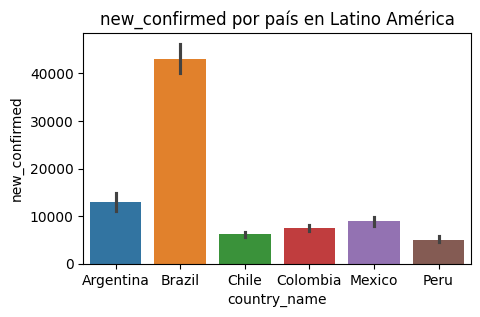

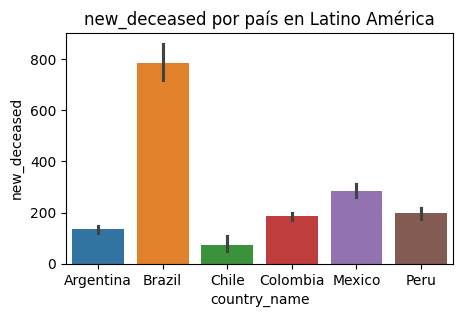

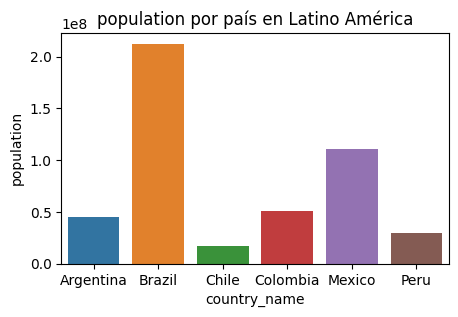

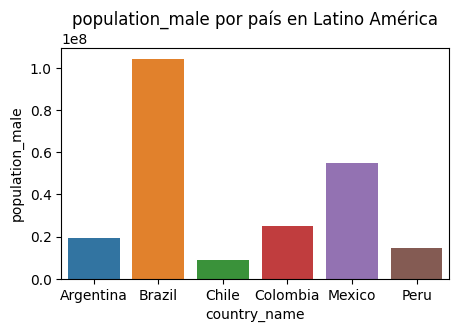

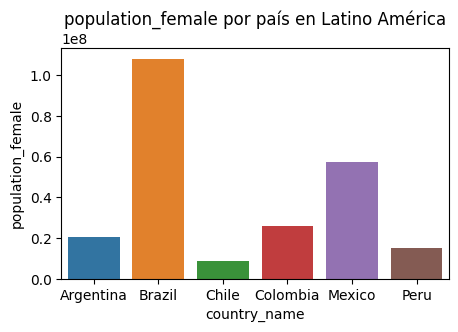

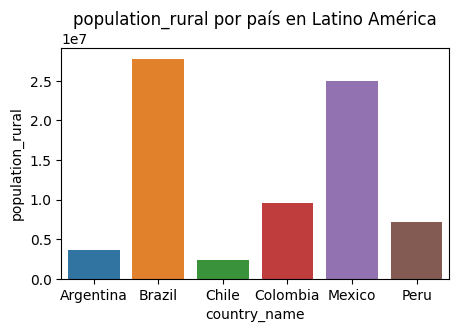

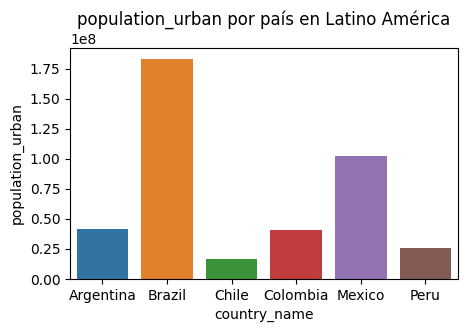

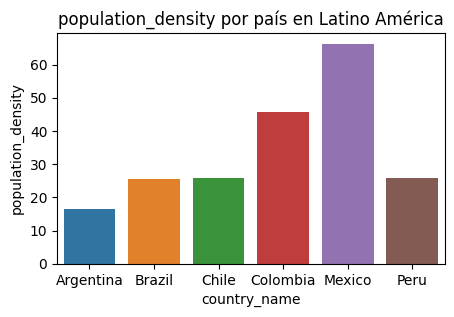

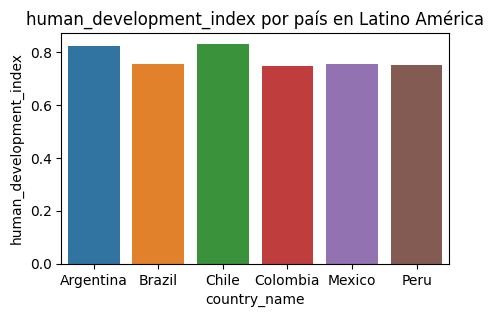

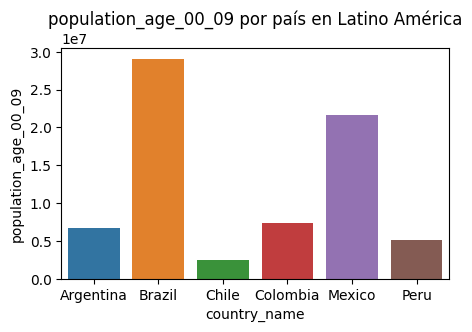

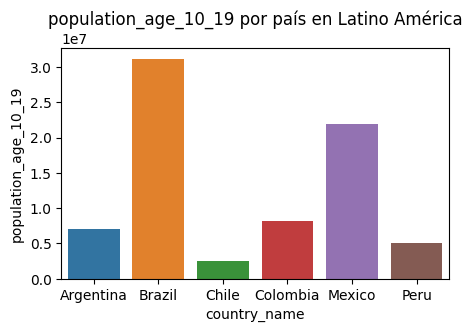

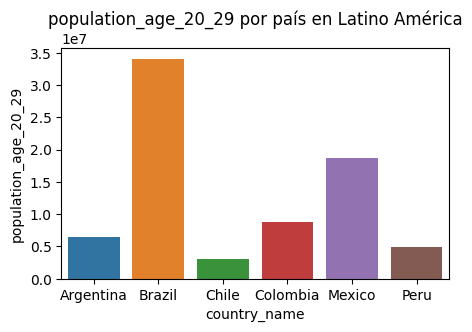

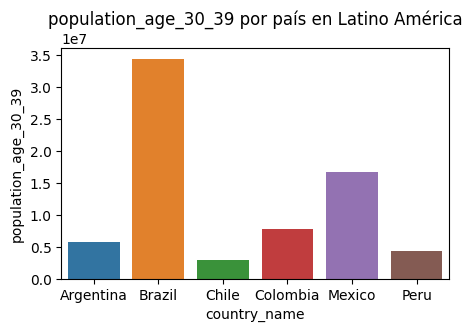

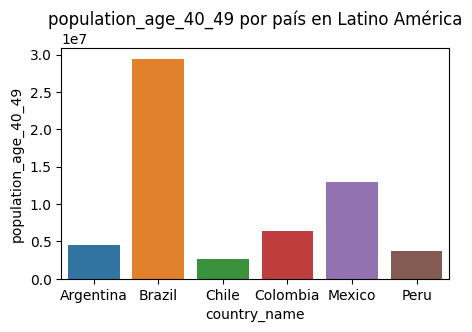

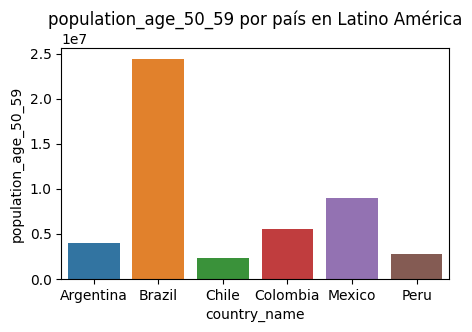

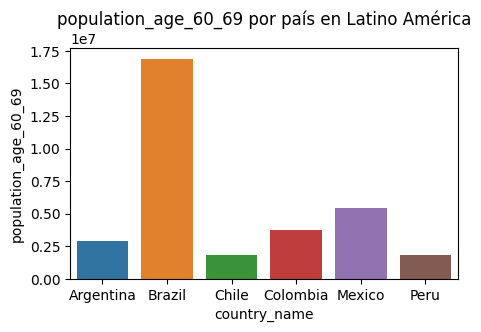

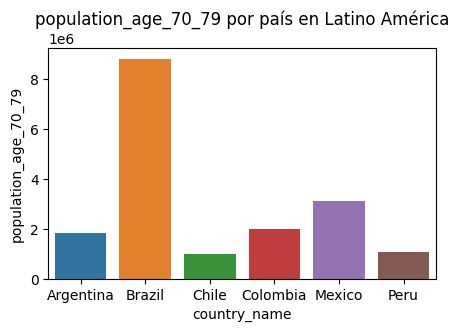

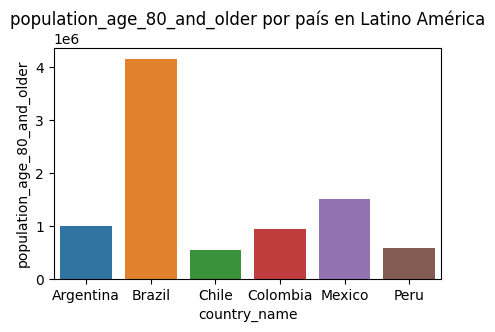

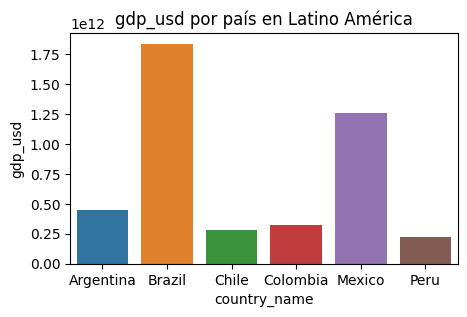

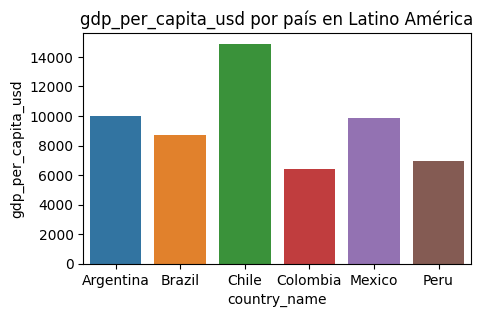

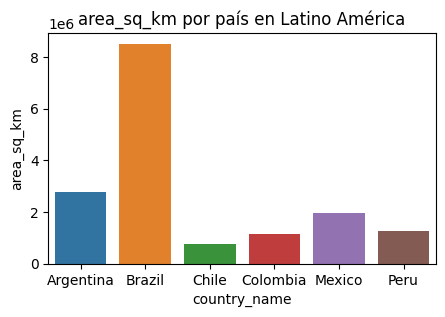

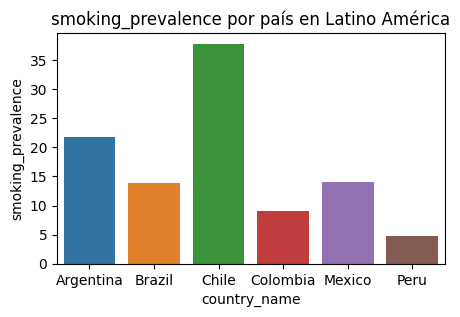

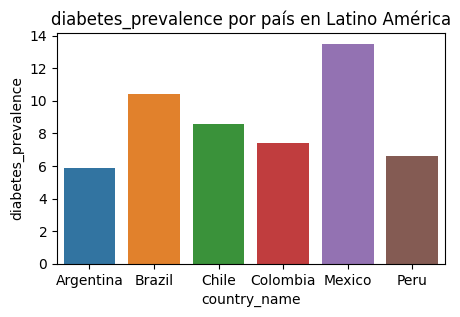

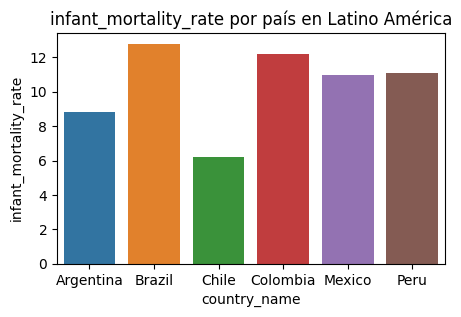

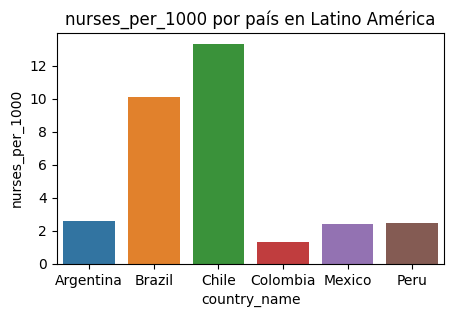

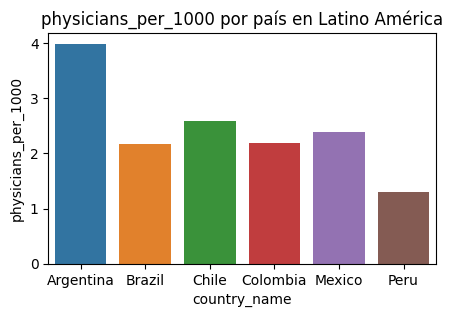

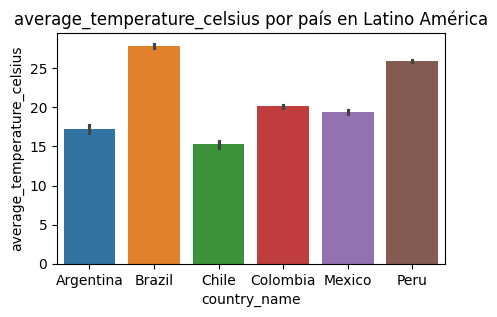

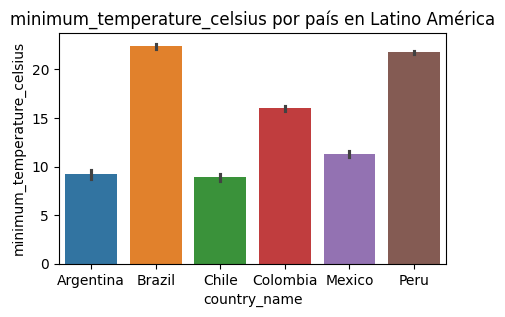

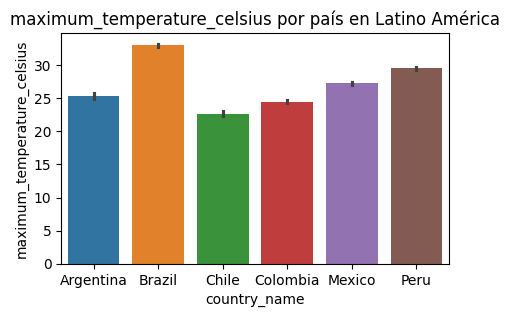

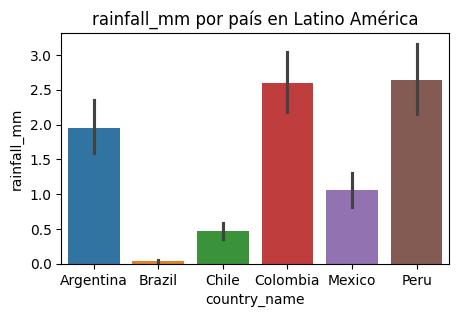

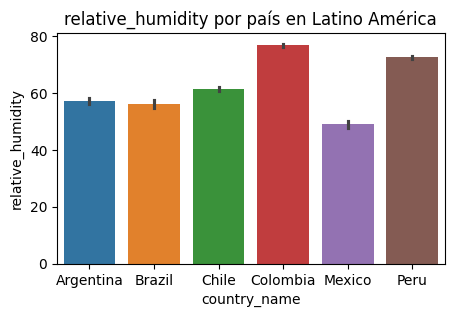

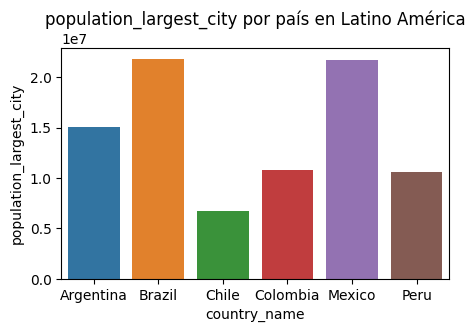

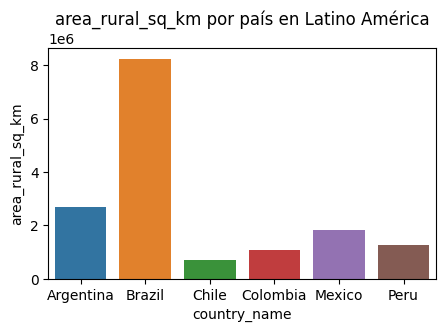

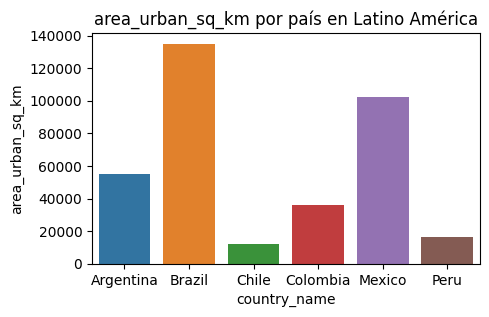

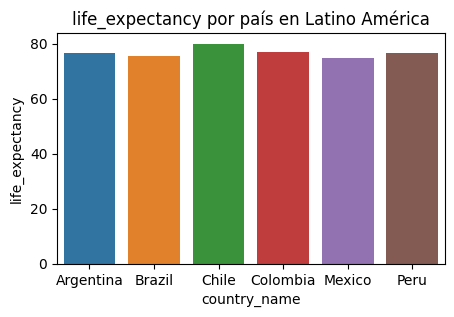

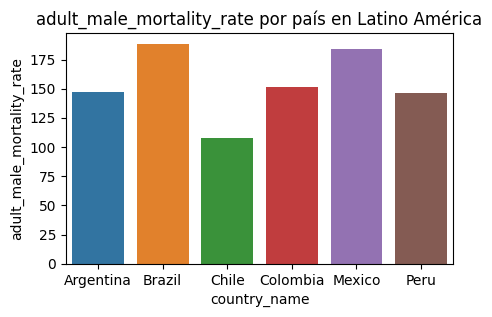

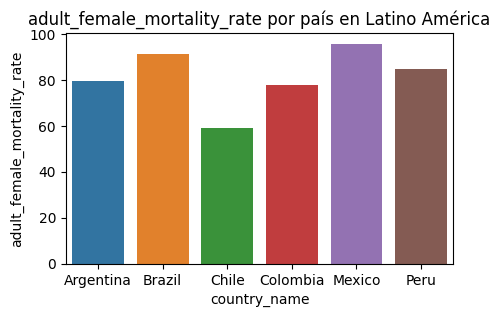

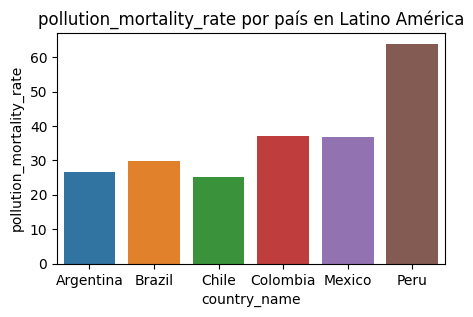

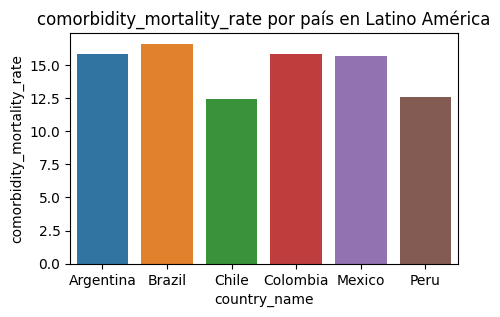

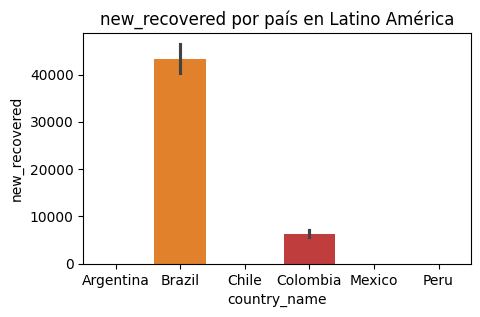

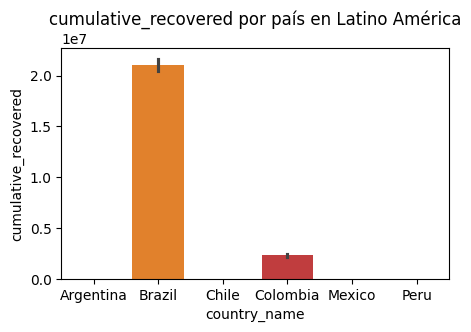

In [50]:
# Se procede a realizar el comportamiento de las columnas respecto a los paises seleccionados para el análisis.
# Principalmente revisión de frecuencias con barplots.

for i in data_latinoamerica_final.columns:
    if i not in ['location_key','date','country_code','country_name','latitude','longitude','cumulative_confirmed','cumulative deceased'
                 'cumulative_recovered','cumulative_vaccine_doses_administered','new_recoveres']:
        fig, ax=plt.subplots(figsize=(5,3))
        sns.barplot(x='country_name',y=i,data=data_latinoamerica_final,ax=ax,hue='country_name')
        plt.title(f'{i} por país en Latino América')
        plt.show()


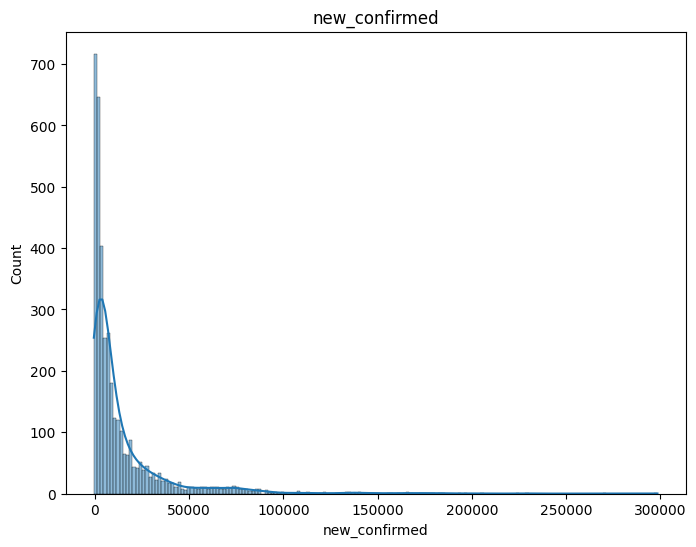

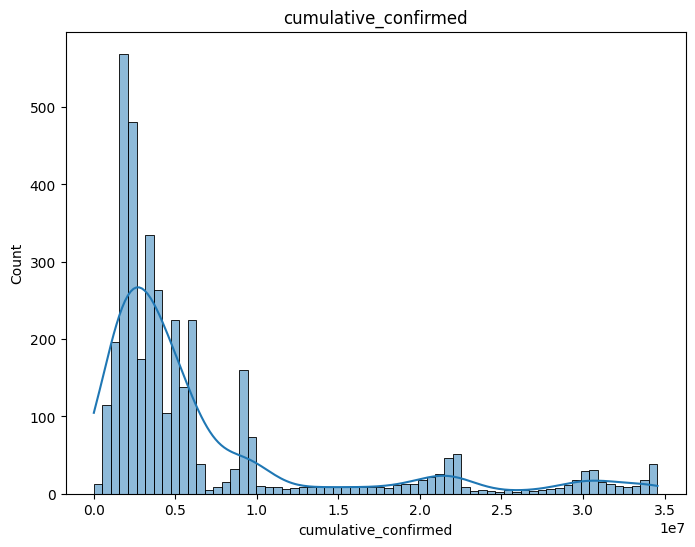

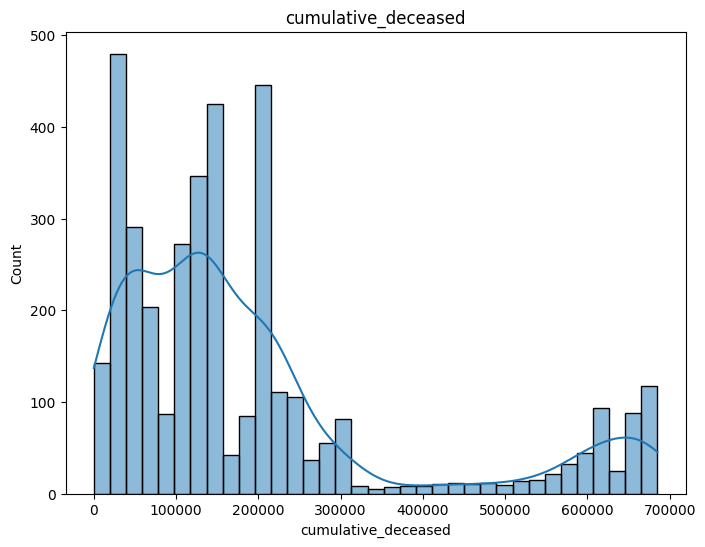

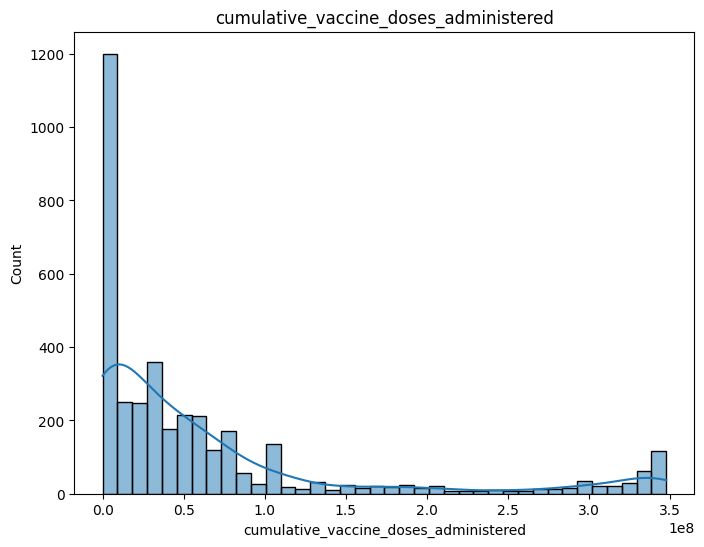

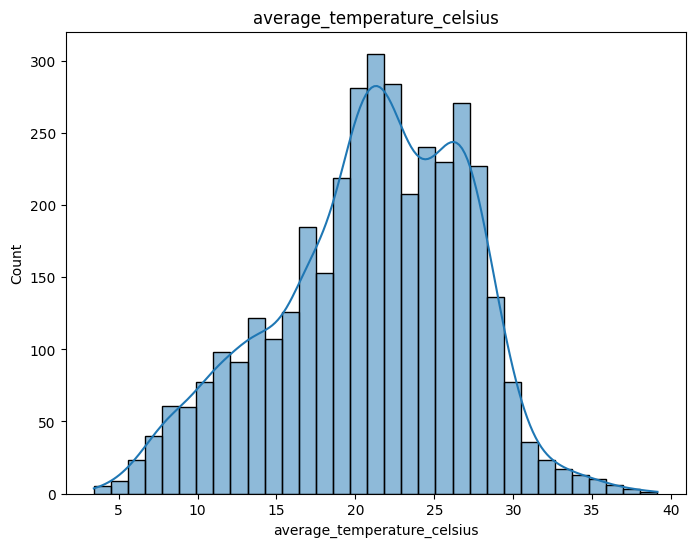

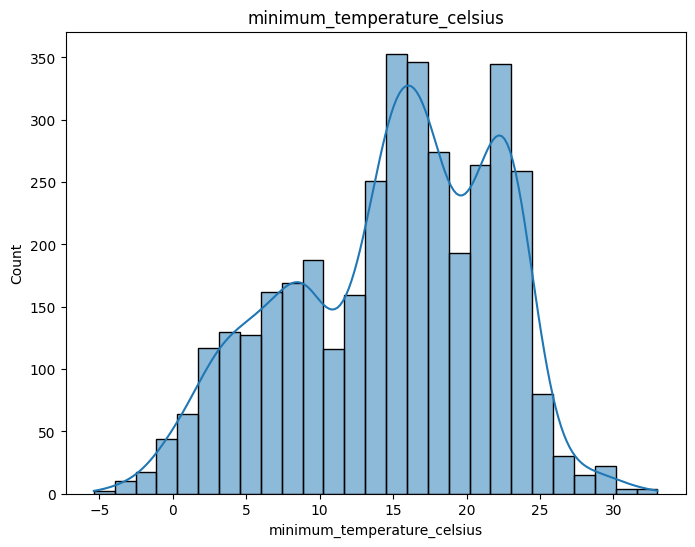

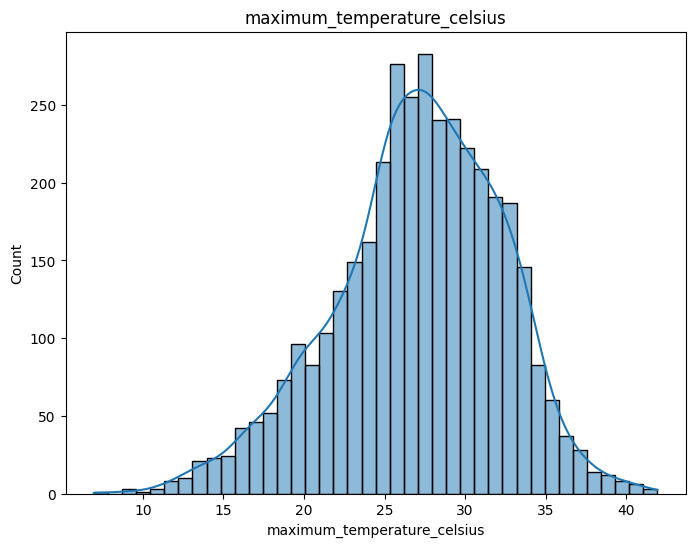

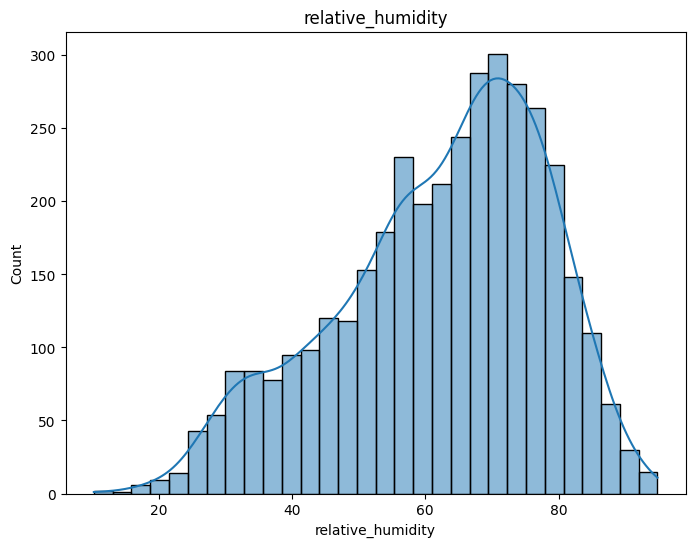

In [52]:
# Se procede a realizar un for pero se utilizaran unos histogramas para ver la distrbución de alguno de los datos

lista_columnas_6=['new_confirmed','cumulative_confirmed','cumulative_deceased','cumulative_vaccine_doses_administered',
                  'average_temperature_celsius','minimum_temperature_celsius','maximum_temperature_celsius','relative_humidity']
# Se crean histogramas de las variables numéricas
for i in data_latinoamerica_final[lista_columnas_6]:
    fig, ax=plt.subplots(figsize=(8,6))
    sns.histplot(data_latinoamerica_final[i],kde=True)
    plt.title(i)
    plt.show()

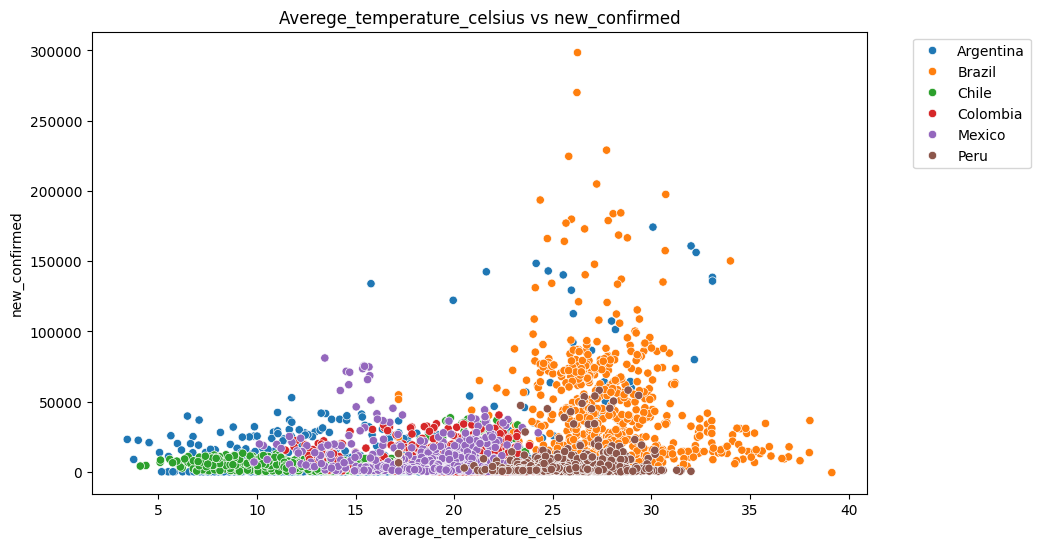

In [54]:
# Se procede un análisis enfocados en algunas variables especificas utilizando diagramas de dispersión
# Gráfica de averege_temperature_celsius vs new_confirmed

fig,ax=plt.subplots(figsize=(10,6))
sns.scatterplot(x='average_temperature_celsius',y='new_confirmed',data=data_latinoamerica_final, hue='country_name')
plt.title('Averege_temperature_celsius vs new_confirmed')
plt.legend(bbox_to_anchor=(1.05,1),loc='upper left')
plt.show()



Se muestra una relación con los casos confirmados y la temperatura media donde principalmente encontramos que los casos se presentaron entre una rango de temperatura de 5 a 30 grados principalmente,pero no muestra que la temperatura haya tenido tanta influencia en los casos confirmados

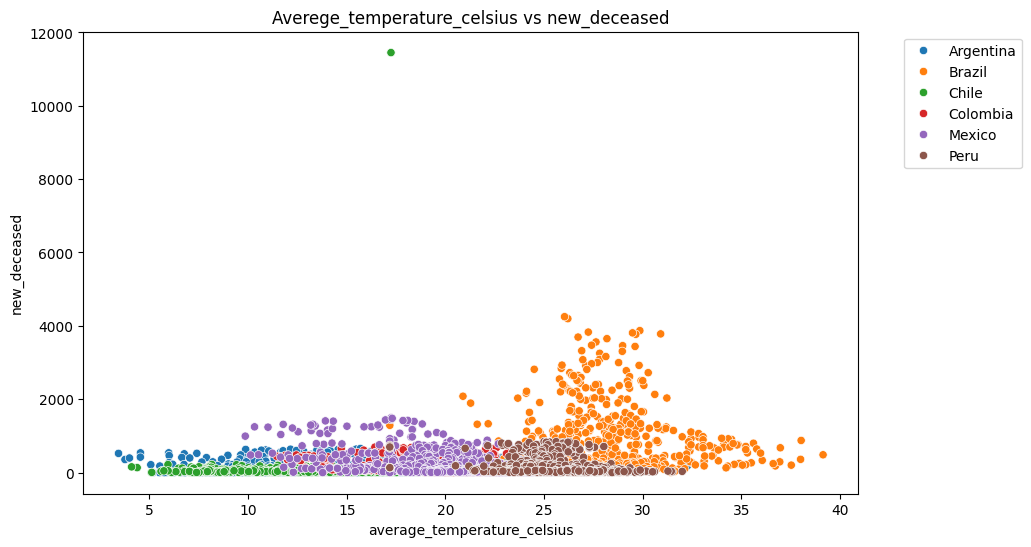

In [55]:
# Gráfica de averege_temperature_celsius vs new_deceased

fig,ax=plt.subplots(figsize=(10,6))
sns.scatterplot(x='average_temperature_celsius',y='new_deceased',data=data_latinoamerica_final, hue='country_name')
plt.title('Averege_temperature_celsius vs new_deceased')
plt.legend(bbox_to_anchor=(1.05,1),loc='upper left')
plt.show()

En la gráfica anterior se ve el comportamiento similar al de los casos confirmados,por ejemplo en Brasil si se nota que la temperatura afecta la cantidad de muertes.A tener en cuenta en Chile en el cual se presentaron casi 12mil muertes a más o menos 18 grados celsius.

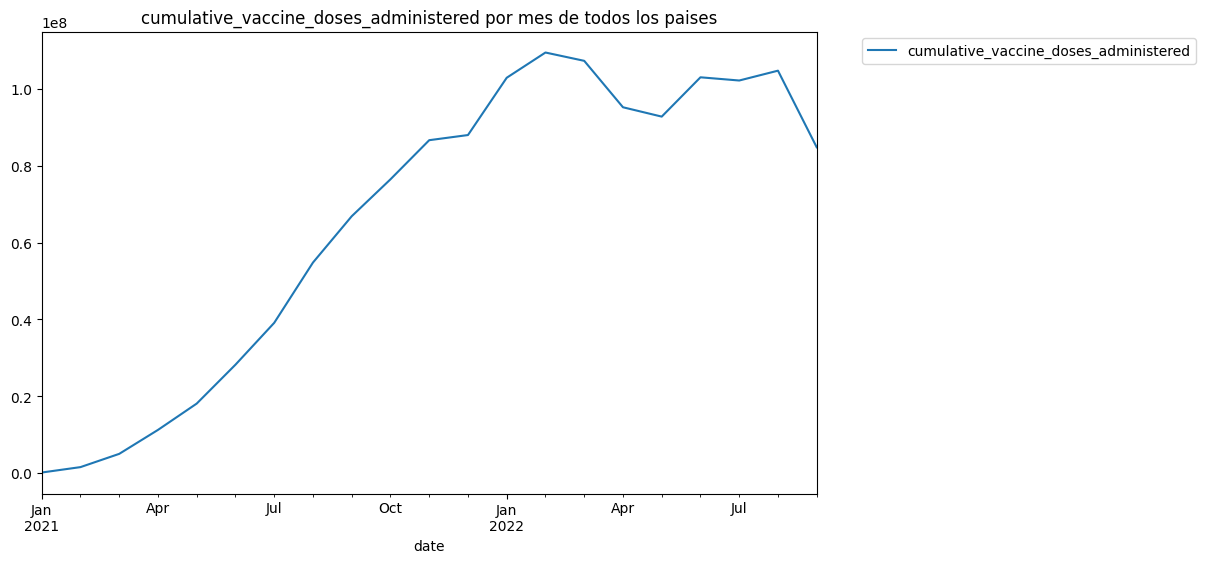

In [57]:
#Gráfica de valores medios de todos los paises cumulative_vaccine_doses_administered
fig=ax=plt.subplots(figsize=(10,6))
data_latinoamerica_final.resample('ME').mean(numeric_only=True)['cumulative_vaccine_doses_administered'].plot()
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
plt.title('cumulative_vaccine_doses_administered por mes de todos los paises')
plt.show()


La gráfica anterior muestra que la cantidad de dosis administradas ha ido en aumento a lo largo del tiempo en los paises seleccionados.

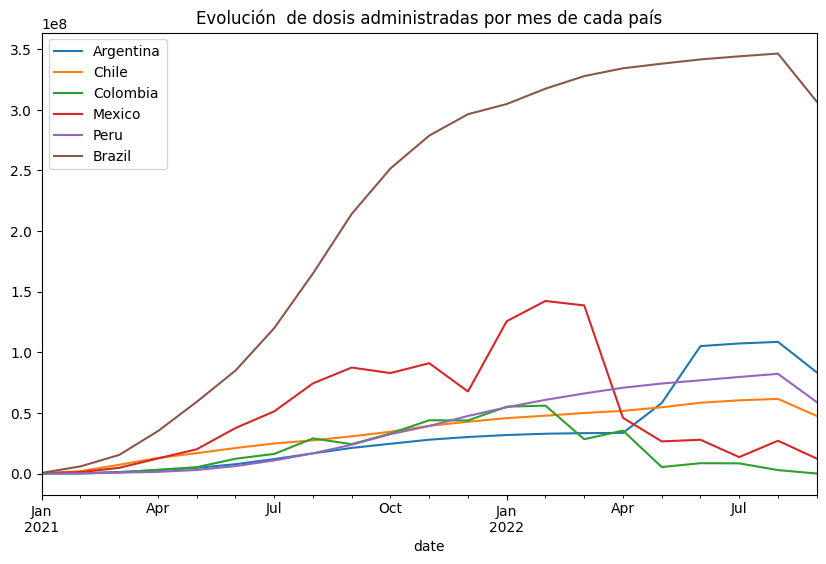

In [58]:
# Evolución  de dosis administradas por mes de cada país
fig=ax=plt.subplots(figsize=(10,6))
for pais in paises_seleccionados:
    data_latinoamerica_final[data_latinoamerica_final['country_name']==pais].resample('ME').mean(numeric_only=True)['cumulative_vaccine_doses_administered'].plot()
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
plt.legend(paises_seleccionados)
plt.title('Evolución  de dosis administradas por mes de cada país')
plt.show()


Si revisamos detalladamente se puede ver que la cantidad de dosis administradas empezo en aumento pero que a largo del tiempo la mayoria de los paises seleccionados emepezaron a mostrar una disminución.Esto puede ser por muchos factores, uno de los principales es la cantidad de vacunas disponibles.

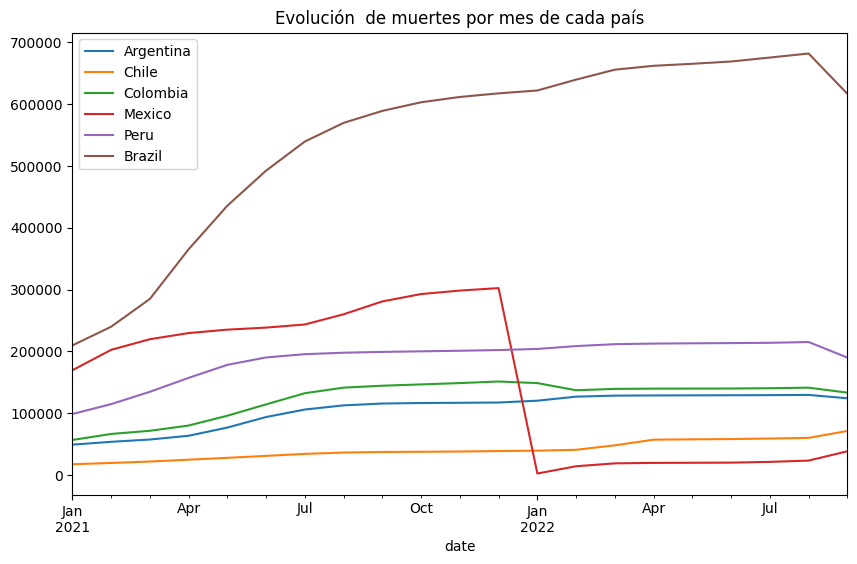

In [59]:
#Evolución  de muertes por mes de cada país
fig=ax=plt.subplots(figsize=(10,6))
for pais in paises_seleccionados:
    data_latinoamerica_final[data_latinoamerica_final['country_name']==pais].resample('ME').mean(numeric_only=True)['cumulative_deceased'].plot()
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
plt.legend(paises_seleccionados)
plt.title('Evolución  de muertes por mes de cada país')
plt.show()

En general la evolución de muertes por cada país se mantuvo constante en paises como Chile , Peru,Colombia y Argentina en un rango entre 1.000 y 20.000, en México hay un caso en que a inicios de 2022 en enero se presento una caida muy abrupta por lo cual es muy curioso ese dato. En Brasil se ha mantenido en aumento iniciando en 20.000 mil llegando a valores de casi 70.000 , cabe recordar que la población es mucho mayor que en el resto de paises seleccionados.

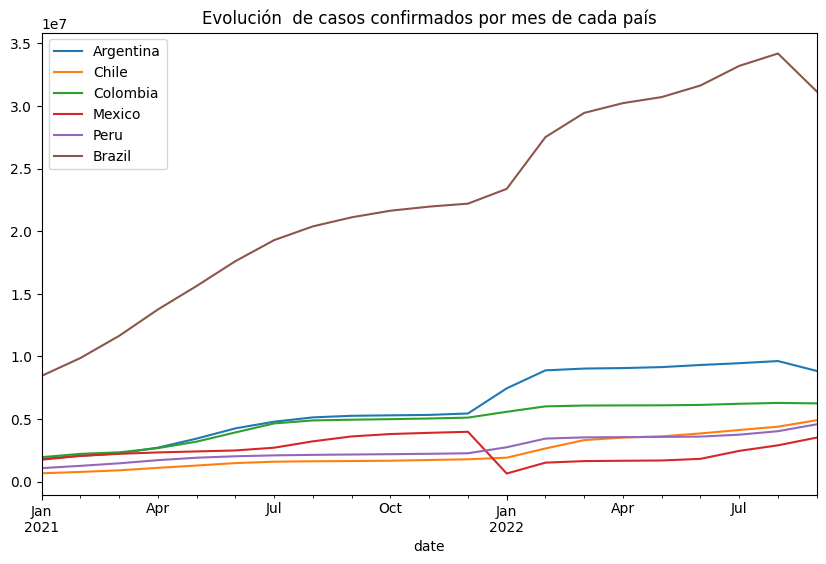

In [60]:
#Evolución  de casos confirmados por mes de cada país
fig=ax=plt.subplots(figsize=(10,6))
for pais in paises_seleccionados:
    data_latinoamerica_final[data_latinoamerica_final['country_name']==pais].resample('ME').mean(numeric_only=True)['cumulative_confirmed'].plot()
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
plt.legend(paises_seleccionados)
plt.title('Evolución  de casos confirmados por mes de cada país')
plt.show()

Los casos confirmados siguen siendo muy proporcionales a la cantidad de habitantes que tiene cada pais, lo cual no permite dar un concepto claro del manejo de la pandemia de cada uno de ellos

In [61]:
 #Evolución  de recuperados por mes de cada país
fig=ax=plt.subplots(figsize=(10,6))
for pais in paises_seleccionados:
    data_latinoamerica_final[data_latinoamerica_final['country_name']==pais].resample('ME').mean(numeric_only=True)['cumulative_recovered'].plot()
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
plt.legend(paises_seleccionados)
plt.title('Evolución  de recuperados por mes de cada país')
plt.show()

Los recuperados siguen siendo muy proporcionales a la cantidad de habitantes que tiene cada pais, lo cual no permite dar un concepto claro del manejo de la pandemia de cada uno de ellos, aunque hay datos que se fueron a cero muy rápido lo cual muestra tal vez falta de data,o algún factor que pueda causar esto.

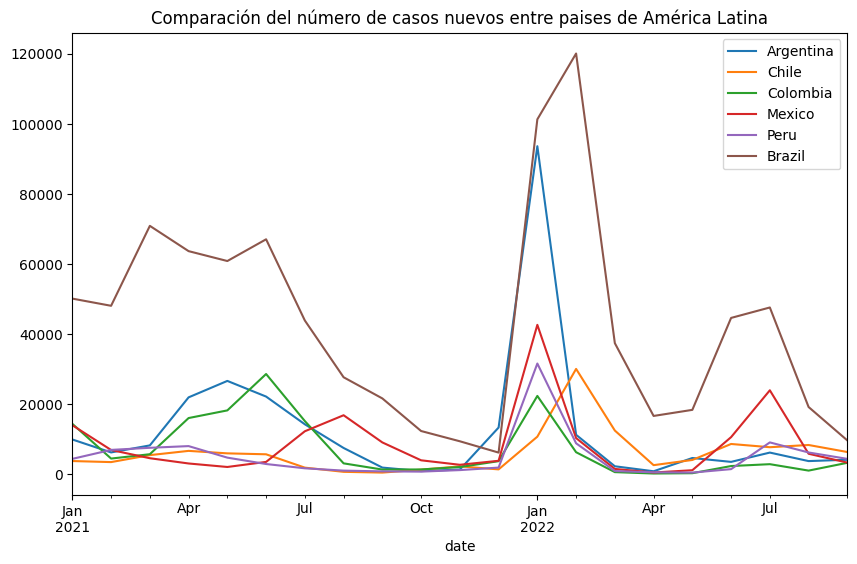

In [62]:
#Comparación del número de casos nuevos entre paises de América Latina
fig=ax=plt.subplots(figsize=(10,6))
for pais in paises_seleccionados:
    data_latinoamerica_final[data_latinoamerica_final['country_name']==pais].resample('ME').mean(numeric_only=True)['new_confirmed'].plot()
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
plt.legend(paises_seleccionados)
plt.title('Comparación del número de casos nuevos entre paises de América Latina')
plt.show()

Se evidencia que los valores pico de la pandemia se encuentran al inicio del año 2022 y ya luego a lo largo del tiempo se normaliza.
Se puede observar que Chile es el país que manejo mejor la pandemia , debido a que su cantidad de muertes y casos confirmados es menor a lo largo del tiempo que el resto de paises, además no es tan desproporcionado los resultados según la cantidad de habitantes que tiene.

In [64]:
#Distribución de dosis acumuladas por pais

sns.displot(data_latinoamerica_final,x='cumulative_vaccine_doses_administered',hue='country_name',kind='kde',fill=True)
plt.title('Distribución de dosis acumuladas por pais')

Text(0.5, 1.0, 'Distribución de dosis acumuladas por pais')

Según la cantidad de dosis acumuladasy su distrbución el peor país que lo ejecuto fue Brasil ,aunque cabe resaltar la cantidad de habitantes que maneja es mucho más alto que el resto de paises.

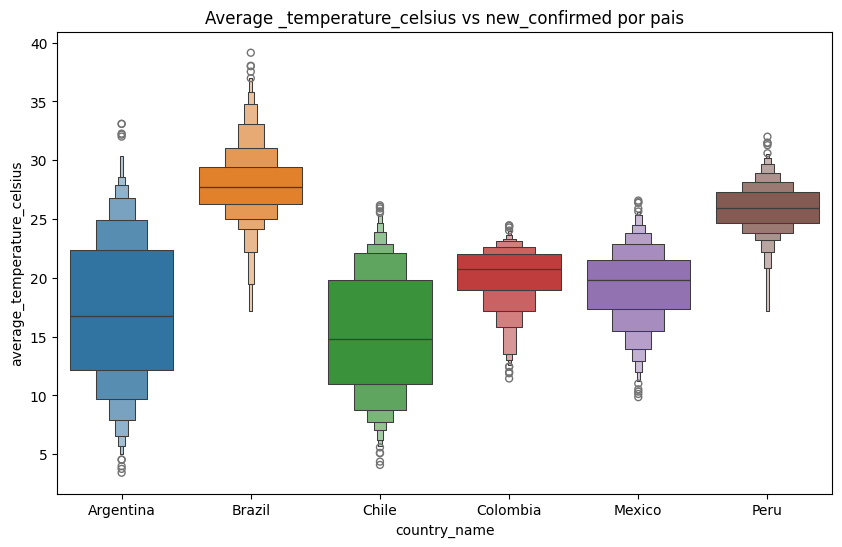

In [66]:
#Average _temperature_celsius vs new_confirmed por pais 

fig,ax=plt.subplots(figsize=(10,6))
sns.boxenplot(x='country_name',y='average_temperature_celsius',data=data_latinoamerica_final, hue='country_name')
plt.title('Average _temperature_celsius vs new_confirmed por pais')
plt.show()

Chile es un pais que tiene un rango de temperatura muy amplio y diferente igual que Argentina, lo cual puede afectar tanto a los casos confirmados y las muertes.

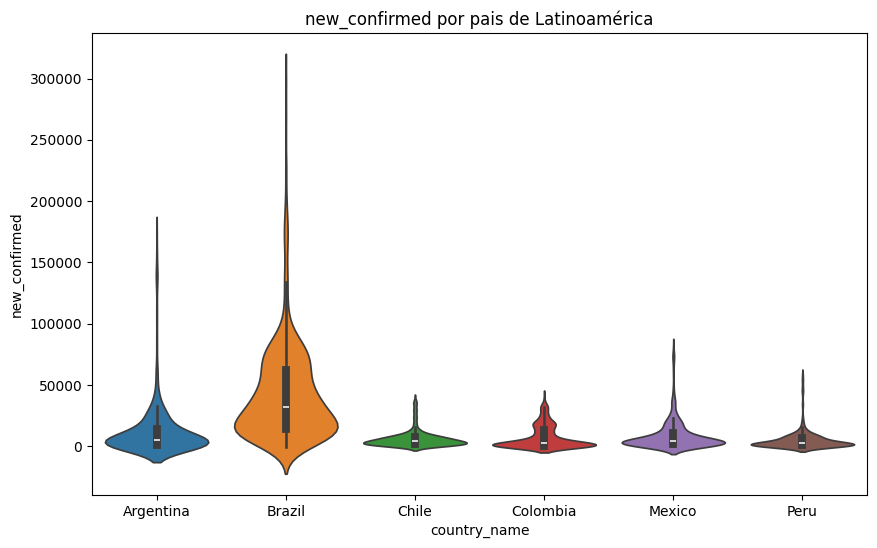

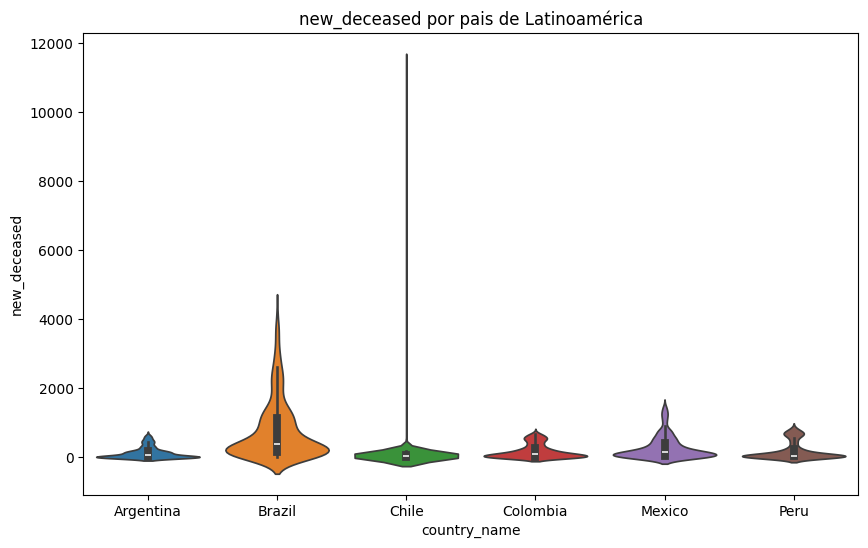

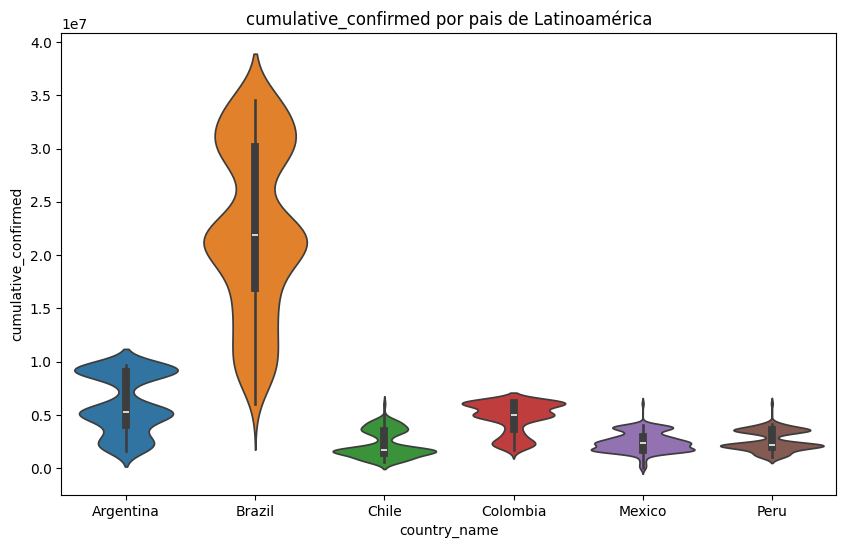

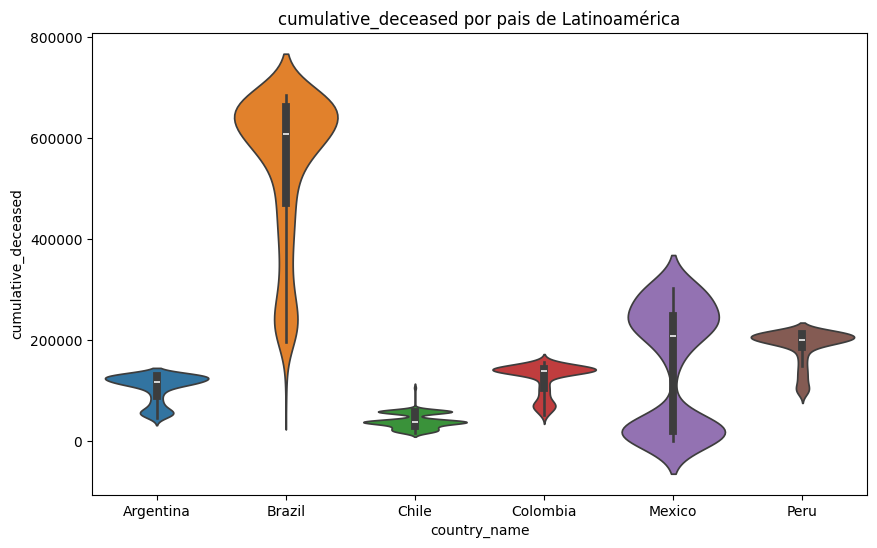

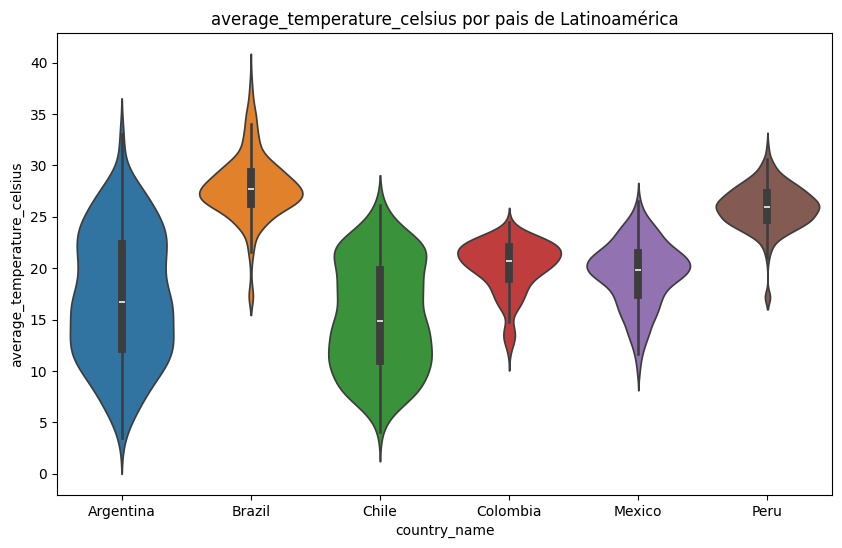

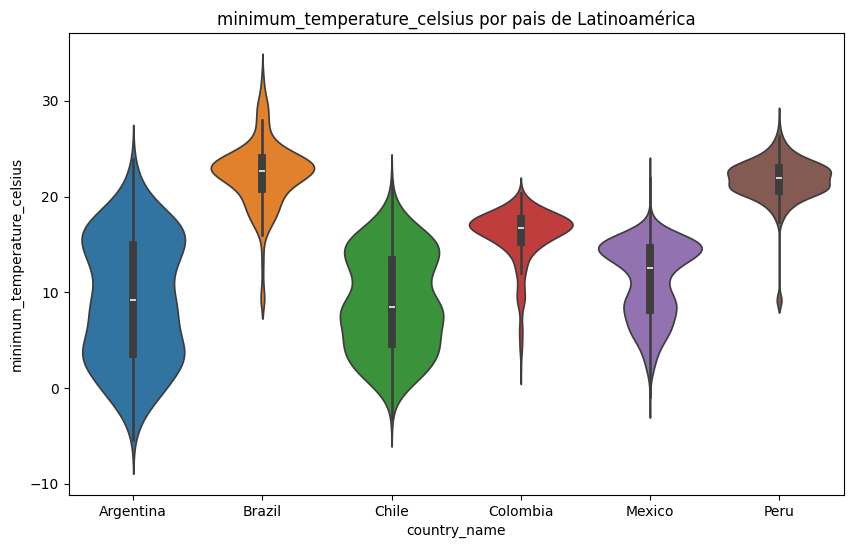

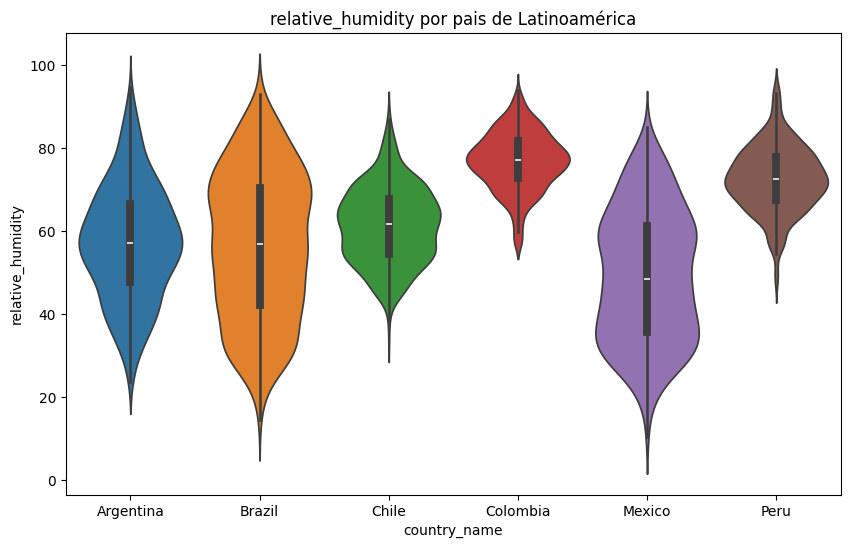

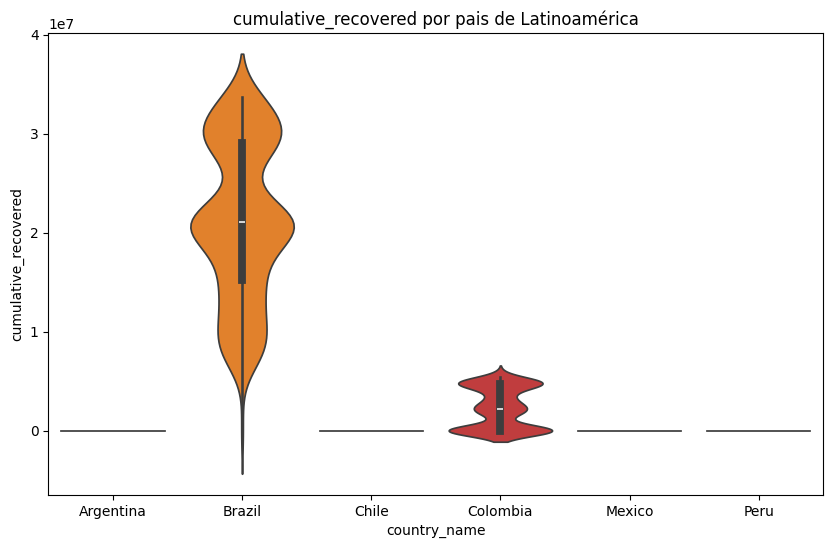

In [70]:
# Se crea un DF con las columnas mayores a 6 porque son las que tienen valores difernetes por cada pais
columnas_mayores_6=[]
for i in data_latinoamerica_final.columns:
    if i not in['location_key','date','country_name','latitude','longitude']:
        if data_latinoamerica_final[i].nunique()>6:
            columnas_mayores_6.append(i)

#Agregar a columnas mayores a 6 la columna  country_name para hacer análisis por pais
columnas_mayores_6.append('country_name')

# Se crea un DF con las columnas mayores a 6
data_latinoamerica_final_mayores_6=data_latinoamerica_final[columnas_mayores_6]

# violinplot en todos los paises para las variables numéricas

for i in data_latinoamerica_final_mayores_6.columns:
    if i not in ['location_key','date','country_code','latitude','longitude','country_name']:
        fig,ax=plt.subplots(figsize=(10,6))
        sns.violinplot(x='country_name', y=i, data=data_latinoamerica_final_mayores_6, hue='country_name')
        plt.title(f'{i} por pais de Latinoamérica')
        plt.show()

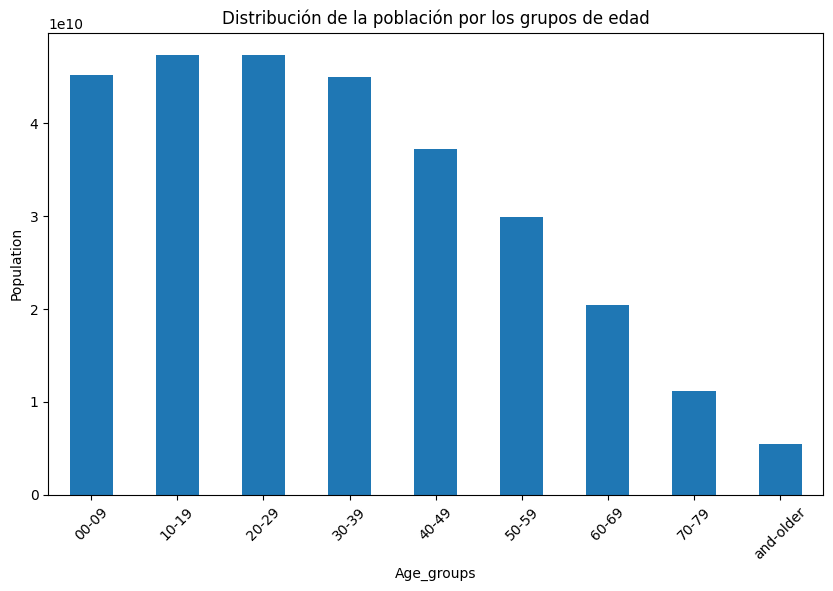

In [72]:
# Calculamos la distribución por grupos de edad
age_columns=['population_age_00_09','population_age_10_19','population_age_20_29','population_age_30_39','population_age_40_49','population_age_50_59','population_age_60_69','population_age_70_79','population_age_80_and_older',]
age_distribution=data_latinoamerica_final[age_columns].sum()

plt.figure(figsize=(10,6))
age_distribution.plot(kind='bar',stacked=True)
plt.xlabel('Age_groups')
plt.ylabel('Population')
plt.title('Distribución de la población por los grupos de edad')
plt.xticks(range(len(age_columns)),[col.split('_')[-2]+'-'+ col.split('_')[-1]for col in age_columns],rotation=45)

plt.show()

Se evidencia que la población se encuentra en su mayoria en el rango de 0 a 50 años.

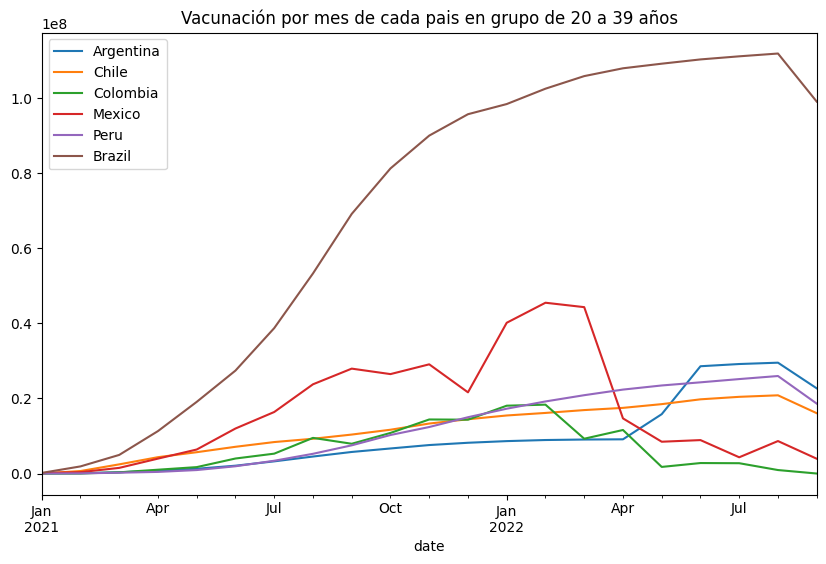

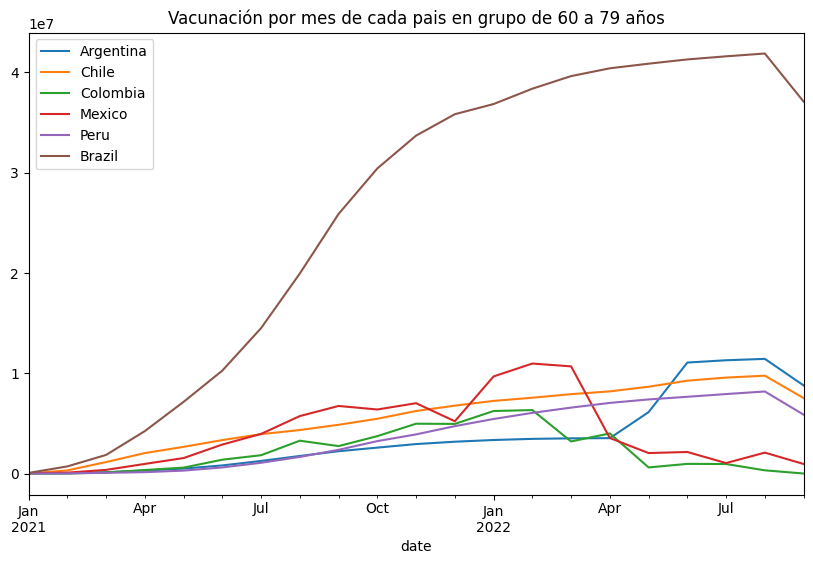

In [80]:
#Grupo etareo más vacunado ,determinar la cantidad de vacunas por cada grupo de la población respectivamente.

data_latinoamerica_final['population_age_00_19']=data_latinoamerica_final['population_age_00_09']+data_latinoamerica_final['population_age_10_19']
data_latinoamerica_final['population_age_20_39']=data_latinoamerica_final['population_age_20_29']+data_latinoamerica_final['population_age_30_39']
data_latinoamerica_final['population_age_40_59']=data_latinoamerica_final['population_age_40_49']+data_latinoamerica_final['population_age_50_59']
data_latinoamerica_final['population_age_60_79']=data_latinoamerica_final['population_age_60_69']+data_latinoamerica_final['population_age_70_79']
data_latinoamerica_final['population_age_80_and_older']=data_latinoamerica_final['population_age_80_and_older']

data_latinoamerica_final['population_age_00_19_vacunados']=data_latinoamerica_final['cumulative_vaccine_doses_administered']*data_latinoamerica_final['population_age_00_19']/data_latinoamerica_final['population']
data_latinoamerica_final['population_age_20_39_vacunados']=data_latinoamerica_final['cumulative_vaccine_doses_administered']*data_latinoamerica_final['population_age_20_39']/data_latinoamerica_final['population']
data_latinoamerica_final['population_age_40_59_vacunados']=data_latinoamerica_final['cumulative_vaccine_doses_administered']*data_latinoamerica_final['population_age_40_59']/data_latinoamerica_final['population']
data_latinoamerica_final['population_age_60_79_vacunados']=data_latinoamerica_final['cumulative_vaccine_doses_administered']*data_latinoamerica_final['population_age_60_79']/data_latinoamerica_final['population']
data_latinoamerica_final['population_age_80_and_older_vacunados']=data_latinoamerica_final['cumulative_vaccine_doses_administered']*data_latinoamerica_final['population_age_80_and_older']/data_latinoamerica_final['population']

data_latinoamerica_final['population_age_00_19_vacunados']=data_latinoamerica_final['population_age_00_19_vacunados'].fillna(0)
data_latinoamerica_final['population_age_20_39_vacunados']=data_latinoamerica_final['population_age_20_39_vacunados'].fillna(0)
data_latinoamerica_final['population_age_40_59_vacunados']=data_latinoamerica_final['population_age_40_59_vacunados'].fillna(0)
data_latinoamerica_final['population_age_60_79_vacunados']=data_latinoamerica_final['population_age_60_79_vacunados'].fillna(0)
data_latinoamerica_final['population_age_80_and_older_vacunados']=data_latinoamerica_final['population_age_80_and_older_vacunados'].fillna(0)

data_latinoamerica_final['population_age_00_19_vacunados']=data_latinoamerica_final['population_age_00_19_vacunados'].astype(int)
data_latinoamerica_final['population_age_20_39_vacunados']=data_latinoamerica_final['population_age_20_39_vacunados'].astype(int)
data_latinoamerica_final['population_age_40_59_vacunados']=data_latinoamerica_final['population_age_40_59_vacunados'].astype(int)
data_latinoamerica_final['population_age_60_79_vacunados']=data_latinoamerica_final['population_age_60_79_vacunados'].astype(int)
data_latinoamerica_final['population_age_80_and_older_vacunados']=data_latinoamerica_final['population_age_80_and_older_vacunados'].astype(int)

data_latinoamerica_final['population_age_00_19_vacunados'].sum()
data_latinoamerica_final['population_age_20_39_vacunados'].sum()
data_latinoamerica_final['population_age_40_59_vacunados'].sum()
data_latinoamerica_final['population_age_60_79_vacunados'].sum()
data_latinoamerica_final['population_age_80_and_older_vacunados'].sum()

#Gráfica de valores medios de todos los paises cumulative_vaccine_doses_administered
fig,ax=plt.subplots(figsize=(10,6))
for pais in paises_seleccionados:
    data_latinoamerica_final[data_latinoamerica_final['country_name']==pais].resample('ME').mean(numeric_only=True)['population_age_00_19_vacunados'].plot()
plt.title('Vacunación por mes de cada pais en grupo de 0 a 19 años')
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
plt.legend(paises_seleccionados)
plt.show()

fig,ax=plt.subplots(figsize=(10,6))
for pais in paises_seleccionados:
    data_latinoamerica_final[data_latinoamerica_final['country_name']==pais].resample('ME').mean(numeric_only=True)['population_age_20_39_vacunados'].plot()
plt.title('Vacunación por mes de cada pais en grupo de 20 a 39 años')
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
plt.legend(paises_seleccionados)
plt.show()

fig,ax=plt.subplots(figsize=(10,6))
for pais in paises_seleccionados:
    data_latinoamerica_final[data_latinoamerica_final['country_name']==pais].resample('ME').mean(numeric_only=True)['population_age_40_59_vacunados'].plot()
plt.title('Vacunación por mes de cada pais en grupo de 40 a 59 años')
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
plt.legend(paises_seleccionados)
plt.show()

fig,ax=plt.subplots(figsize=(10,6))
for pais in paises_seleccionados:
    data_latinoamerica_final[data_latinoamerica_final['country_name']==pais].resample('ME').mean(numeric_only=True)['population_age_60_79_vacunados'].plot()
plt.title('Vacunación por mes de cada pais en grupo de 60 a 79 años')
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
plt.legend(paises_seleccionados)
plt.show()

fig,ax=plt.subplots(figsize=(10,6))
for pais in paises_seleccionados:
    data_latinoamerica_final[data_latinoamerica_final['country_name']==pais].resample('ME').mean(numeric_only=True)['population_age_80_and_older_vacunados'].plot()
plt.title('Vacunación por mes de cada pais en grupo de 80 años en adelante')
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
plt.legend(paises_seleccionados)
plt.show()

Se evidencia comportamiento muy similares en todos los rangos de edad , teniendo primero que todo un aumento y luego inicia la respectiva disminución a lo largo del tiempo.

In [81]:
# Mortalidad por genero

plt.figure(figsize=(10,6))
sns.barplot(data=data_latinoamerica_final,x='country_name',y='adult_male_mortality_rate', color='green', label='Male Mortality rate')
sns.barplot(data=data_latinoamerica_final,x='country_name',y='adult_female_mortality_rate', color='red', label='Female Mortality rate')
plt.xticks(rotation=45)
plt.ylabel('Mortality_rate')
plt.title('Comparación de la tasa de mortalidad masculina vs femenina por pais')
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
plt.show ()

Se puede observar de acuerdo a la gráfica que la mortalidad en muy pareja entre hombres y mujeres , en algunos lugares es más alta los hombres como en Brasil, pero en Argentina es más alta la de las mujeres , pero en general es muy poca la diferencia. 

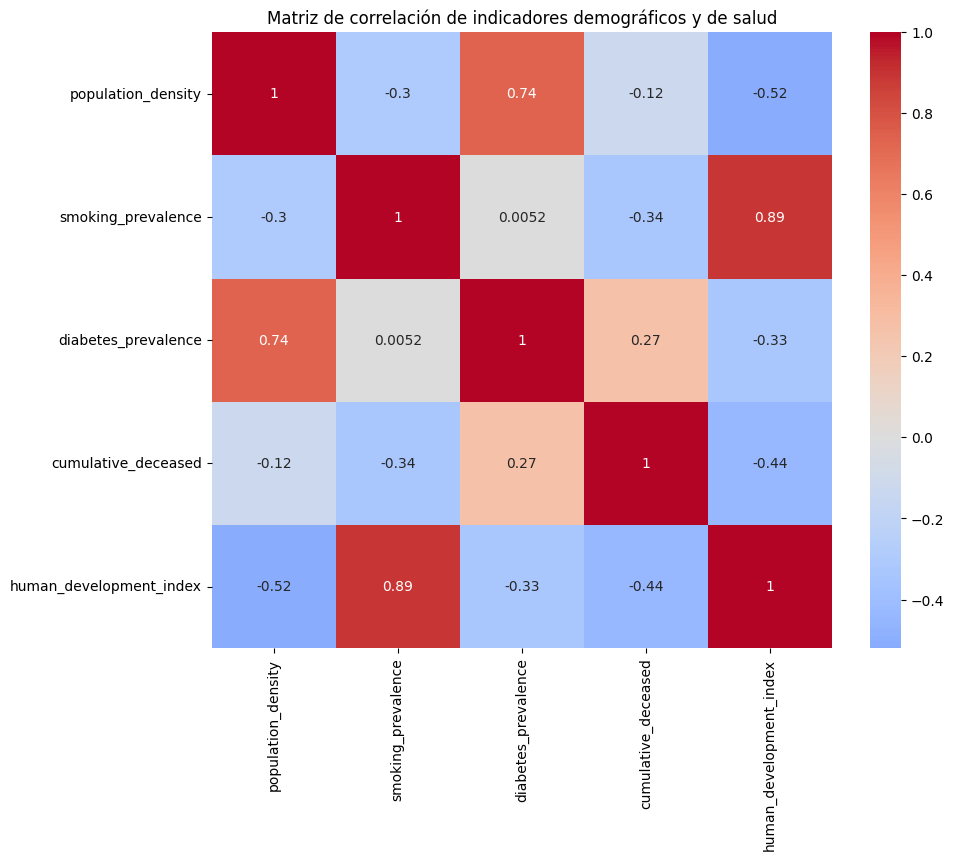

In [82]:
# Subset de columnas para desarrollar matriz de correlación

columns=['population_density', 'smoking_prevalence', 'diabetes_prevalence','cumulative_deceased','human_development_index']
correlation_matrix=data_latinoamerica_final[columns].corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm',center=0)
plt.title('Matriz de correlación de indicadores demográficos y de salud')
plt.show()

Se puede observar que fumar y tener diabetes son de las enfermedades preexistentes que más afectan a la población en los paises seleccionados.se podria decir que son las enfermedades que más común han causado muertes.


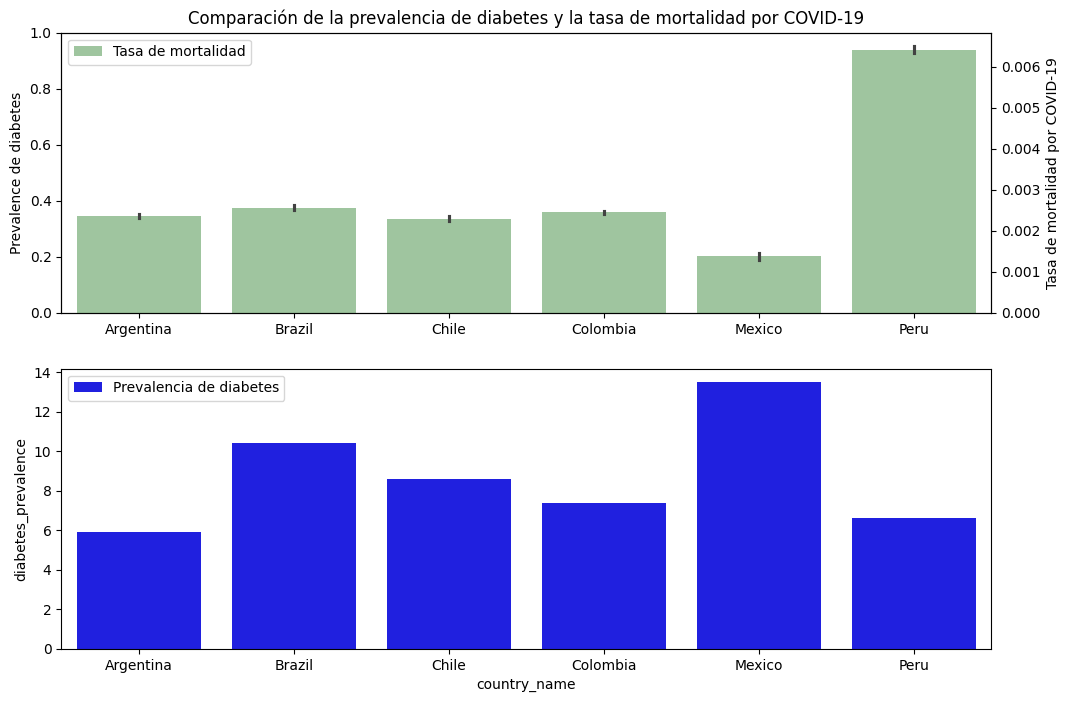

In [89]:
# Comparación de la prevalencia de diabetes y la tasa de mortalidad por COVID-19
fig,(ax,ax1)=plt.subplots(2,1, figsize=(12,8))
sns.barplot(data=data_latinoamerica_final, x=data_latinoamerica_final['country_name'],y=data_latinoamerica_final['diabetes_prevalence'],color='blue',label='Prevalencia de diabetes')
ax1=ax.twinx()
sns.barplot(data=data_latinoamerica_final, x=data_latinoamerica_final['country_name'],y=data_latinoamerica_final['cumulative_deceased']/data_latinoamerica_final['population'],color='green',label='Tasa de mortalidad',ax=ax1,alpha=0.4)
plt.xticks(rotation=50)
ax.set_ylabel('Prevalence de diabetes')
ax1.set_ylabel('Tasa de mortalidad por COVID-19')
plt.title('Comparación de la prevalencia de diabetes y la tasa de mortalidad por COVID-19')
plt.show()



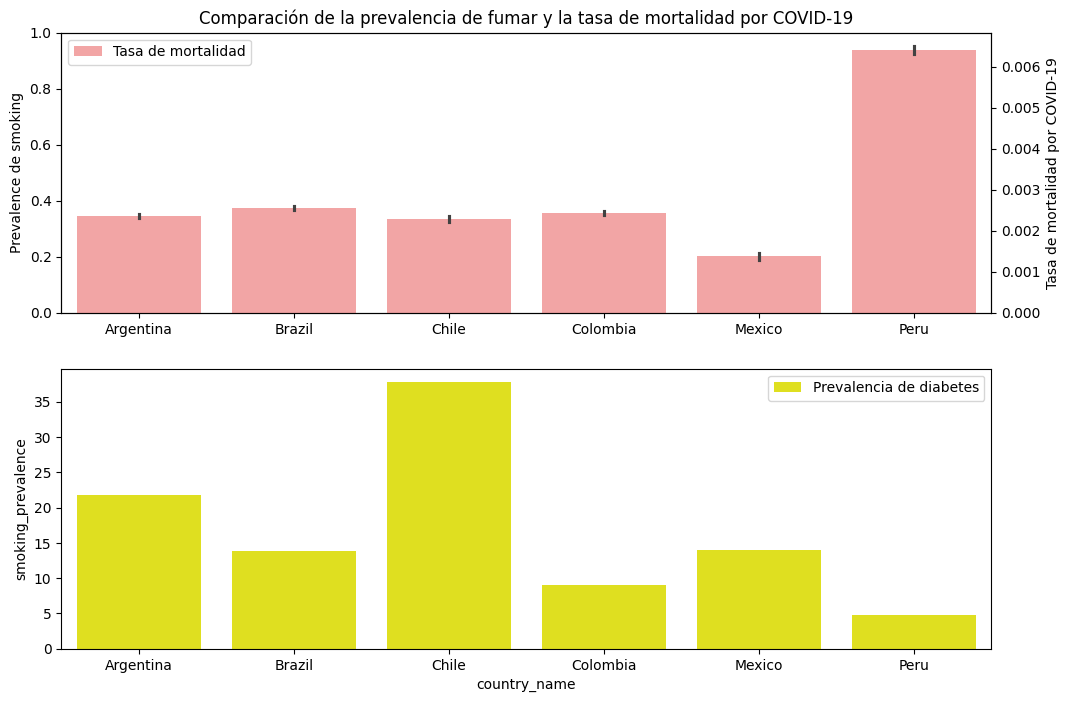

In [90]:
# Comparación de la prevalencia de fumar y la tasa de mortalidad por COVID-19
fig,(ax,ax1)=plt.subplots(2,1, figsize=(12,8))
sns.barplot(data=data_latinoamerica_final, x=data_latinoamerica_final['country_name'],y=data_latinoamerica_final['smoking_prevalence'],color='yellow',label='Prevalencia de diabetes')
ax1=ax.twinx()
sns.barplot(data=data_latinoamerica_final, x=data_latinoamerica_final['country_name'],y=data_latinoamerica_final['cumulative_deceased']/data_latinoamerica_final['population'],color='red',label='Tasa de mortalidad',ax=ax1,alpha=0.4)
plt.xticks(rotation=50)
ax.set_ylabel('Prevalence de smoking')
ax1.set_ylabel('Tasa de mortalidad por COVID-19')
plt.title('Comparación de la prevalencia de fumar y la tasa de mortalidad por COVID-19')
plt.show()


In [ ]:
Tenemos que Perú tiene un alta alta tasa de mortalidad con poca prevalencia de fumar y diabetes, Brasil y México tienen una alta prevalencia de diabetes pero su tasa de mortalidad
permanece baja. Es un caso muy parecido a Chile donde su prevalencia de fumar es muy alta pero su tasa de mortalidad es baja .

## Avance 3

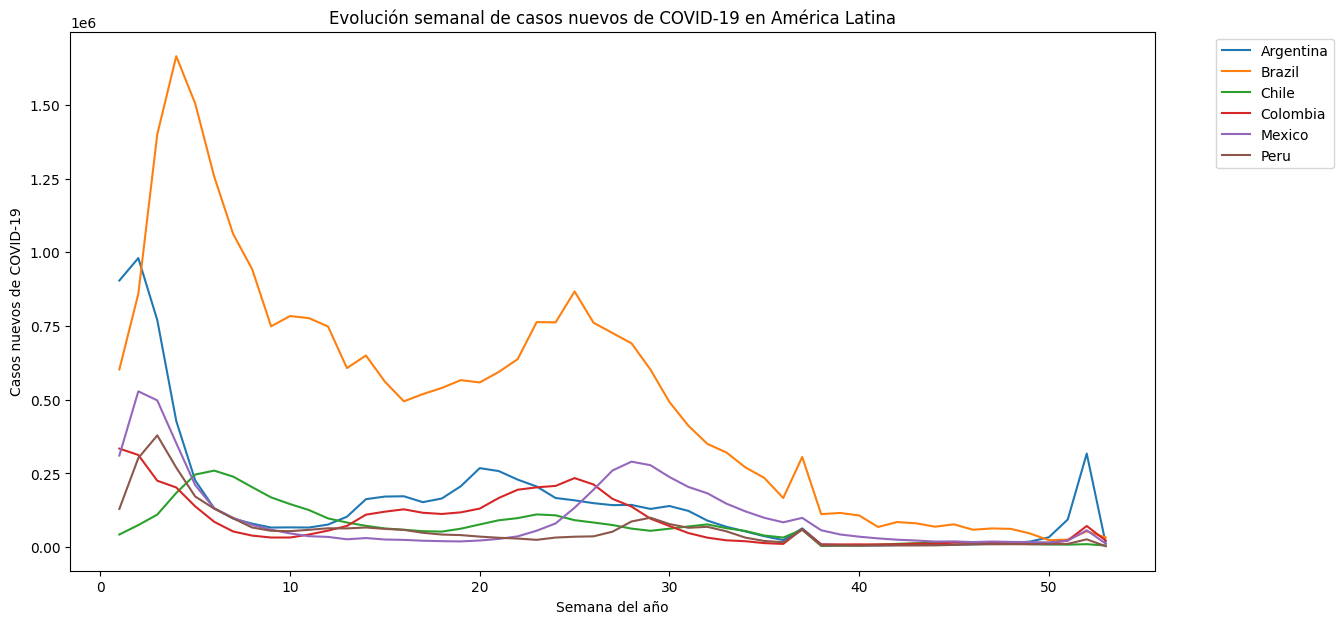

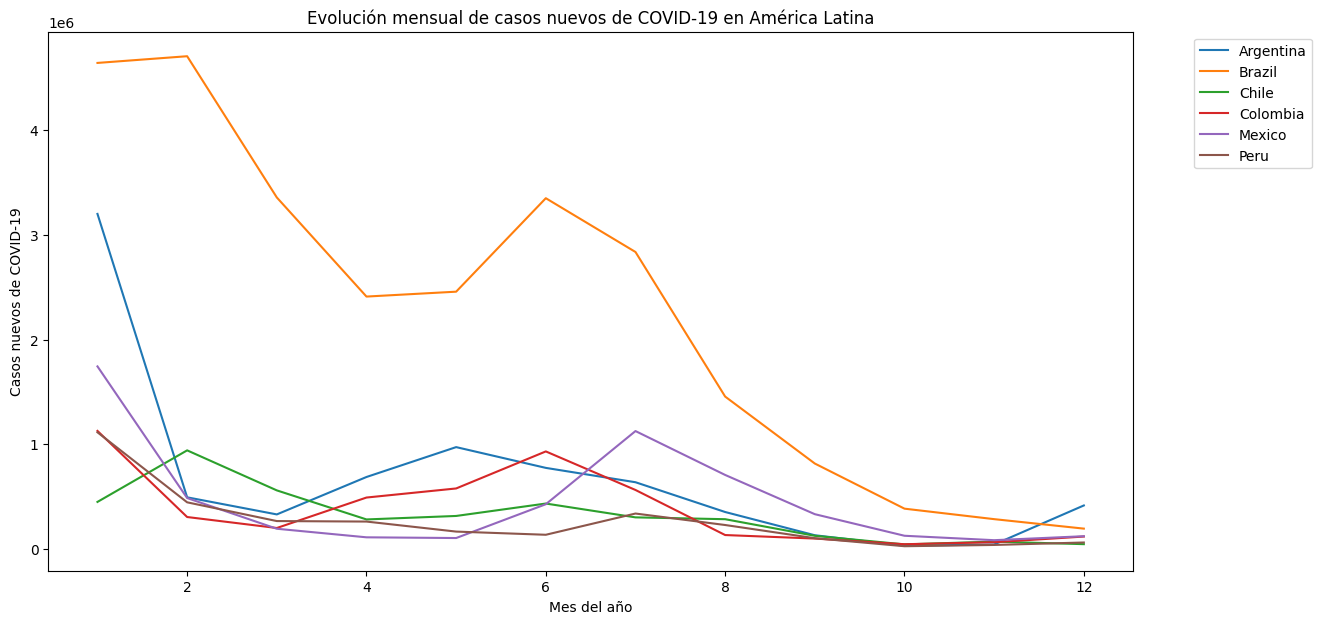

In [93]:
# Se va realizar un análisis de la evolución mensual
data_latinoamerica_final['week']=data_latinoamerica_final.index.isocalendar().week
weekly_cases=data_latinoamerica_final.groupby(['country_name','week'])['new_confirmed'].sum().reset_index()
plt.figure(figsize=(14,7))
for country in weekly_cases['country_name'].unique():
    country_weekly_cases=weekly_cases[weekly_cases['country_name']==country]
    plt.plot(country_weekly_cases['week'],country_weekly_cases['new_confirmed'],label=country)

plt.xlabel('Semana del año')
plt.ylabel('Casos nuevos de COVID-19')
plt.title('Evolución semanal de casos nuevos de COVID-19 en América Latina')
plt.legend(bbox_to_anchor=(1.05,1),loc='upper left')
plt.show()

# Ahora mensual
data_latinoamerica_final['month']=data_latinoamerica_final.index.month
month_cases=data_latinoamerica_final.groupby(['country_name','month'])['new_confirmed'].sum().reset_index()
plt.figure(figsize=(14,7))
for country in month_cases['country_name'].unique():
    country_month_cases=month_cases[month_cases['country_name']==country]
    plt.plot(country_month_cases['month'],country_month_cases['new_confirmed'],label=country)

plt.xlabel('Mes del año')
plt.ylabel('Casos nuevos de COVID-19')
plt.title('Evolución mensual de casos nuevos de COVID-19 en América Latina')
plt.legend(bbox_to_anchor=(1.05,1),loc='upper left')
plt.show()

Se evidencia en las gráficas anteriores que los casos nuevos al inicio del año son muy elevados y a lo largo del tiempo se van disminuyendo.

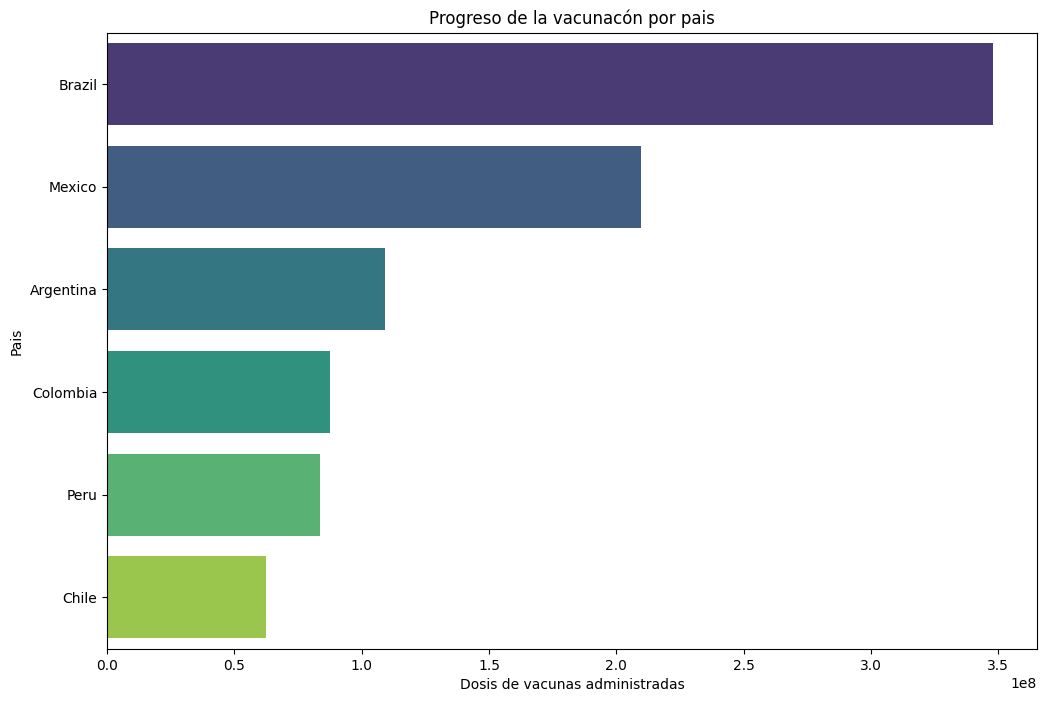

In [94]:
# Progreso de la vacunación por pais
vaccination_data=data_latinoamerica_final.groupby('country_name')['cumulative_vaccine_doses_administered'].max().sort_values(ascending=False)

plt.figure(figsize=(12,8))
sns.barplot(x=vaccination_data.values,y=vaccination_data.index,hue=vaccination_data.index, palette='viridis')
plt.xlabel('Dosis de vacunas administradas')
plt.ylabel('Pais')
plt.title('Progreso de la vacunacón por pais')
plt.show()

Brasil es el pais que mayor dosis de vacunas a administrado y Chile el menor , por lo tanto es más claro aún que se debe tener en cuenta la cantidad de población por pais y la cantidad de vacunas disponibles.


C:\Users\rikrd\AppData\Local\Temp\ipykernel_10296\3832301063.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=urban_cases['urban_population_percentage'],y=urban_cases.index, palette='viridis')


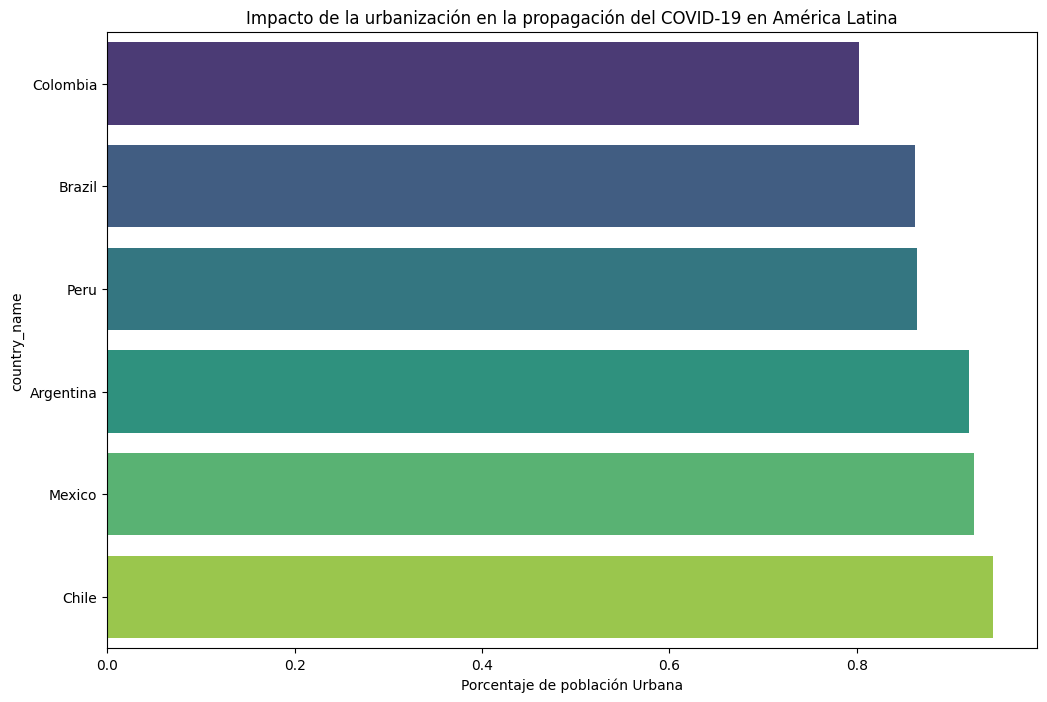

In [95]:
#Impacto de la urbanización en la propagación del COVID-19 en América Latina

data_latinoamerica_final['urban_population_percentage']=data_latinoamerica_final['population_urban']/data_latinoamerica_final['population']
urban_cases=data_latinoamerica_final.groupby('country_name').last().sort_values(by='urban_population_percentage')

plt.figure(figsize=(12,8))
sns.barplot(x=urban_cases['urban_population_percentage'],y=urban_cases.index, palette='viridis')
plt.xlabel('Porcentaje de población Urbana')
plt.title('Impacto de la urbanización en la propagación del COVID-19 en América Latina')
plt.show()


El impacto de la urbanización se dio en mayor relevancia en Chile debido tal vez a su densidad poblacional en la parte urbana.Igualmente es curioso que al tener un mayor impacto es el que mejor ha manejado la pandemia.

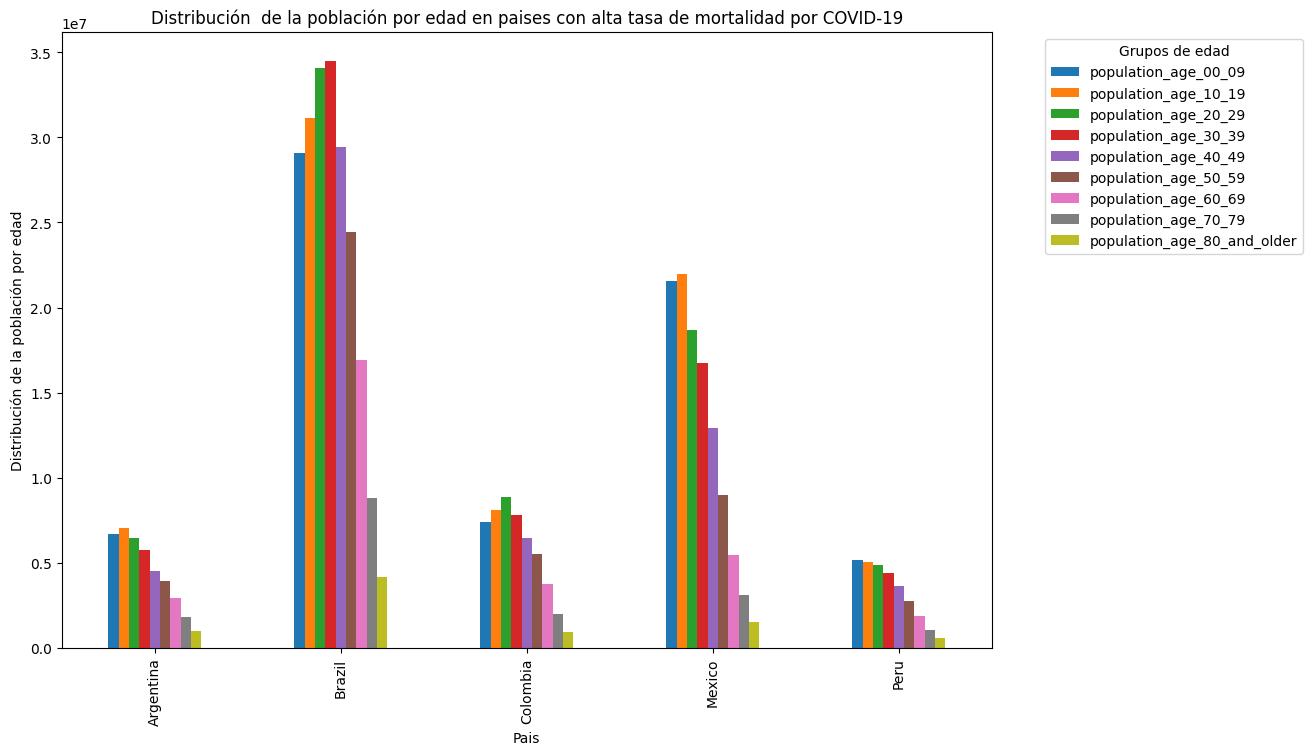

In [100]:
# Distribución  de la población por edad en paises con alta tasa de mortalidad por COVID-19

high_mortality_countries=data_latinoamerica_final.groupby('country_name')['cumulative_deceased'].max().sort_values(ascending=False).head(5).index
age_groups=['population_age_00_09','population_age_10_19','population_age_20_29','population_age_30_39','population_age_40_49','population_age_50_59','population_age_60_69','population_age_70_79','population_age_80_and_older']
age_distribution=data_latinoamerica_final[data_latinoamerica_final['country_name'].isin(high_mortality_countries)].groupby('country_name')[age_groups].mean()

age_distribution.plot(kind='bar', stacked=False, figsize=(12,8))
plt.xlabel('Pais')
plt.ylabel('Distribución de la población por edad')
plt.title('Distribución  de la población por edad en paises con alta tasa de mortalidad por COVID-19')
plt.legend(bbox_to_anchor=(1.05,1), loc= 'upper left', title='Grupos de edad')
plt.show()

En la gráfica se muestra que la tasa de mortalidad esta claramente en grupo de población que tiene mayor dominancia que como se menciono en gráficos anteriores se encuentra en el rango de 0 a 49 años.

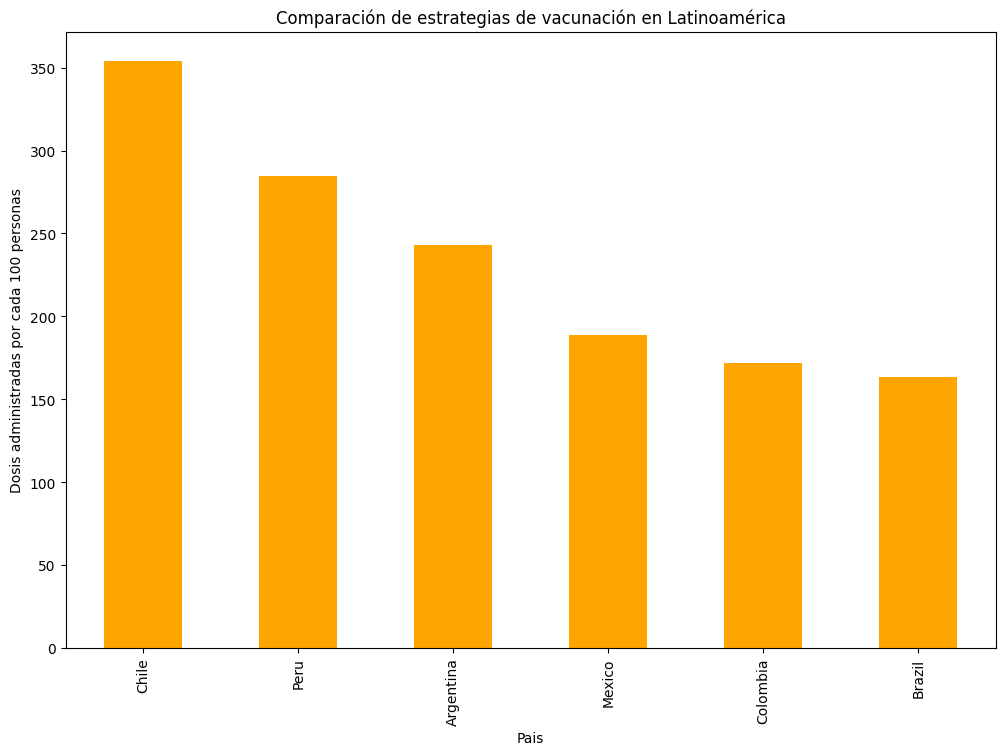

In [102]:
# Comparación de estrategias de vacunación en Latinoamérica

vaccination_strategy=data_latinoamerica_final.groupby('country_name')['cumulative_vaccine_doses_administered'].max()/data_latinoamerica_final.groupby('country_name')['population'].max()*100
vaccination_strategy.sort_values(ascending=False).plot(kind='bar', figsize=(12,8),color='orange')
plt.xlabel('Pais')
plt.ylabel('Dosis administradas por cada 100 personas')
plt.title('Comparación de estrategias de vacunación en Latinoamérica')
plt.show()


Se termina de confirmar el buen manejo que tuvo Chile de la pandemia ,mientras que Brasil y Colombia no muestran la mejor estrategia de vacunación entre los paises seleccionados.

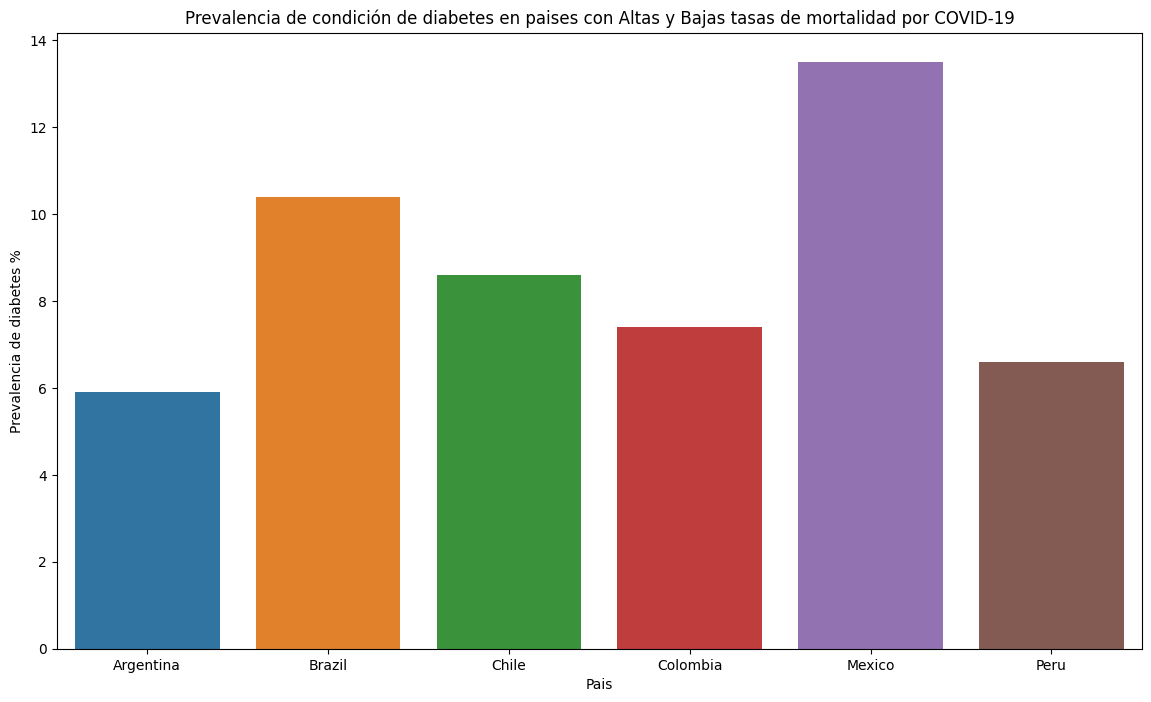

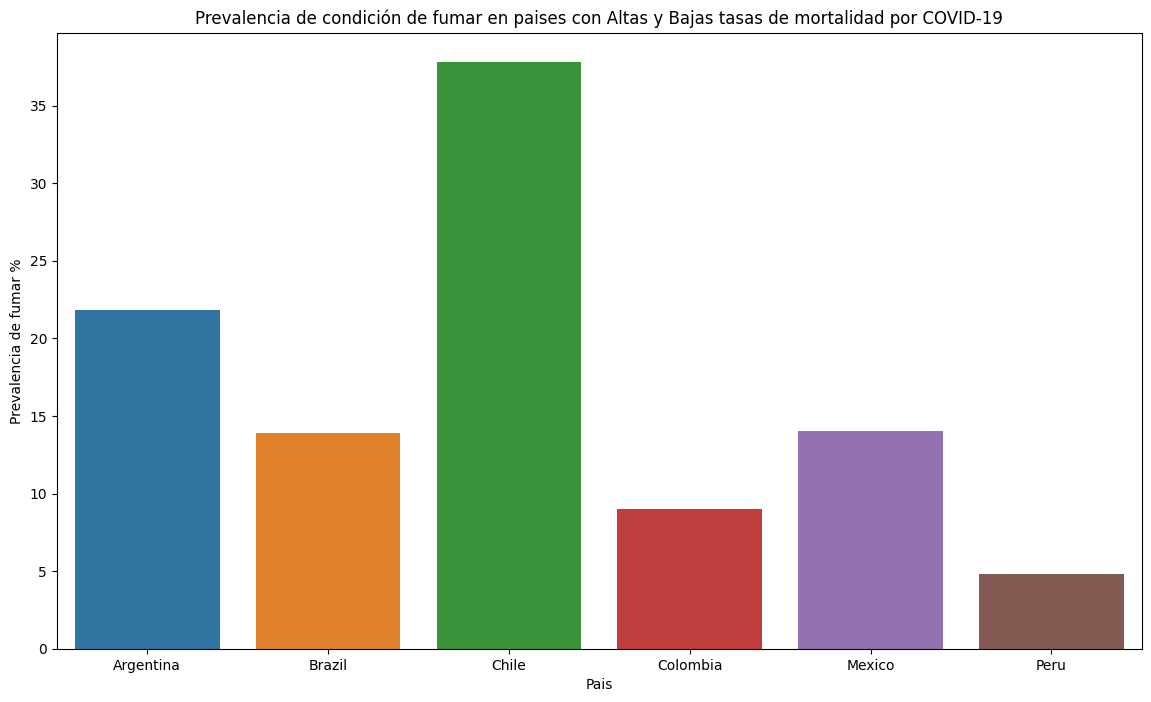

In [104]:
# Prevalencia de diabetes

top_countries=data_latinoamerica_final.groupby('country_name')['cumulative_deceased'].max().nlargest(5).index
bottom_countries=data_latinoamerica_final.groupby('country_name')['cumulative_deceased'].max().nsmallest(5).index
conditions_data=data_latinoamerica_final[data_latinoamerica_final['country_name'].isin(top_countries.union(bottom_countries))]

plt.figure(figsize=(14,8))
sns.barplot(data=conditions_data, x='country_name',y='diabetes_prevalence',hue='country_name')
plt.xlabel('Pais')
plt.ylabel('Prevalencia de diabetes %')
plt.title('Prevalencia de condición de diabetes en paises con Altas y Bajas tasas de mortalidad por COVID-19')
plt.show()

#Prevalencia de fumar
plt.figure(figsize=(14,8))
sns.barplot(data=conditions_data, x='country_name',y='smoking_prevalence',hue='country_name')
plt.xlabel('Pais')
plt.ylabel('Prevalencia de fumar %')
plt.title('Prevalencia de condición de fumar en paises con Altas y Bajas tasas de mortalidad por COVID-19')
plt.show()

Se puede evidenciar que Brasil y México son los paises que más han sufrido la condición de diabetes mientras que la de fumar son Chile y Argentina.

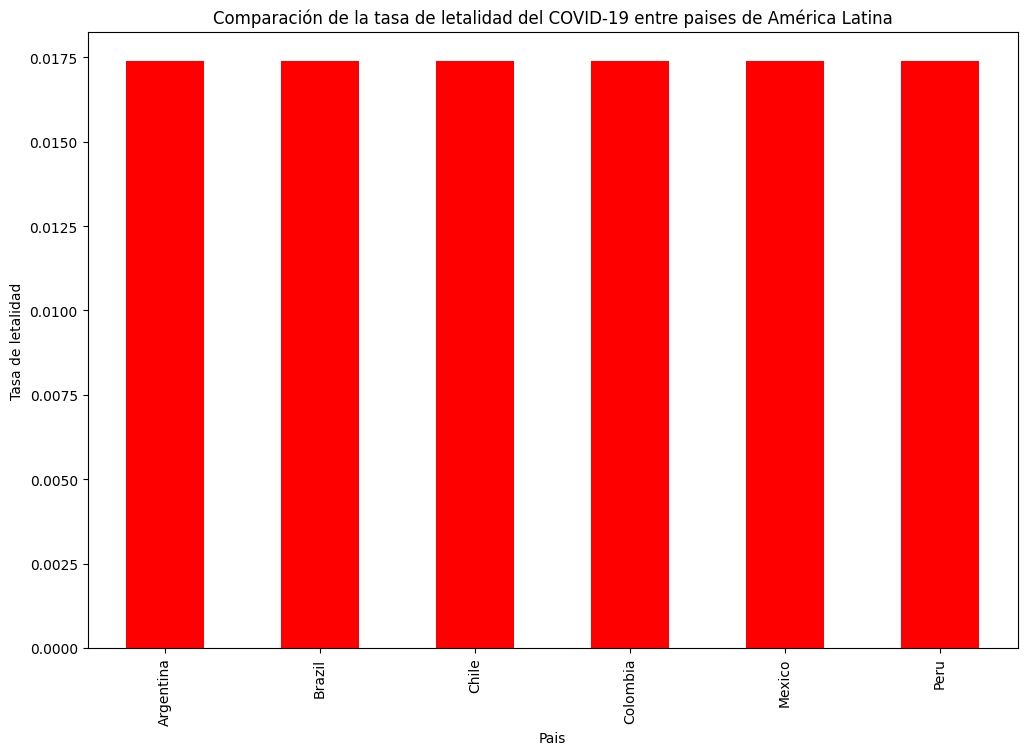

In [106]:
# Fatalidad por pais

data_latinoamerica_final['cases_fatality_rate']=data_latinoamerica_final['cumulative_deceased']/data_latinoamerica_final['cumulative_confirmed']
fatality_rates= data_latinoamerica_final.groupby('country_name')['cases_fatality_rate'].last().sort_values()
plt.figure(figsize=(12,8))
fatality_rates.plot(kind='bar',color='red')
plt.xlabel('Pais')
plt.ylabel('Tasa de letalidad')
plt.title('Comparación de la tasa de letalidad del COVID-19 entre paises de América Latina')
plt.show()


Todos los paises muestran un comportanmiento muy similar en cuanto a la fatalidad, sin embargo revisando todo lo hecho es claro que ha disminuido,y todo esto debido a los planes implementados por los paises tanto en vacunación como en otros aspectos importantes para controlar una pandemia.


C:\Users\rikrd\AppData\Local\Temp\ipykernel_10296\1433850079.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_latinoamerica_final.resample('M').mean(numeric_only=True)['new_confirmed'].plot(ax=ax1,color='blue',label='Casos nuevos')
C:\Users\rikrd\AppData\Local\Temp\ipykernel_10296\1433850079.py:9: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_latinoamerica_final.resample('M').mean(numeric_only=True)['percentage_vaccinated'].plot(ax=ax2,color='yellow',label='Porcentaje de la población vacunada')


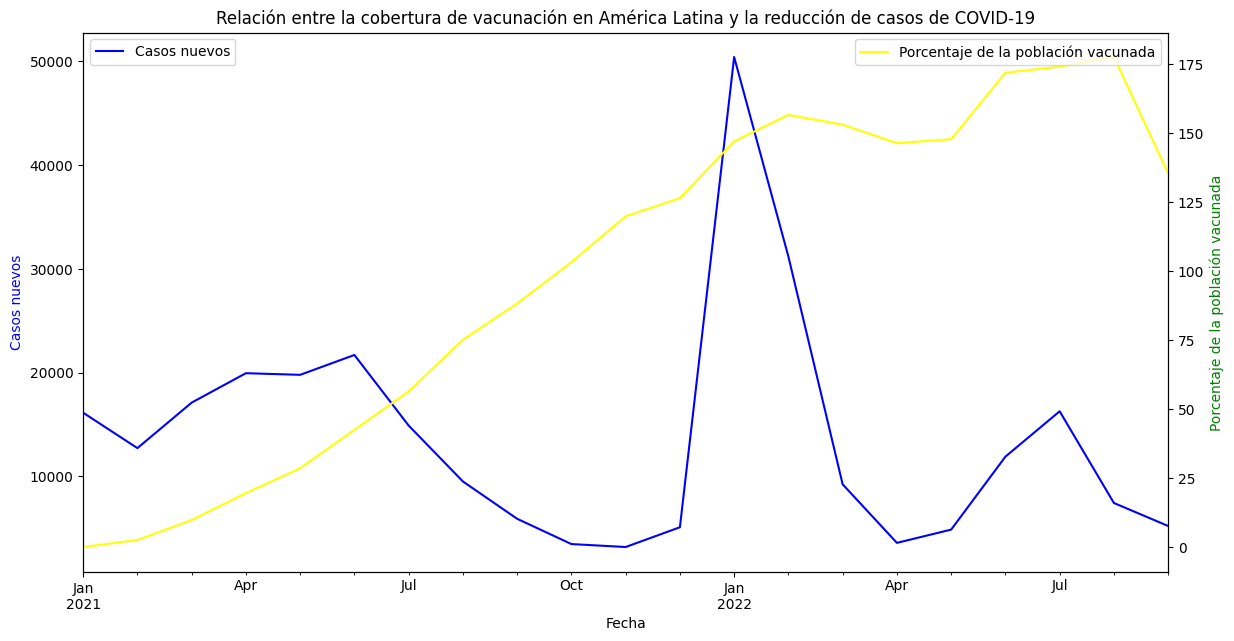

In [108]:
# Como evoluciona la vacunación en América Latina y la reducción de casos de COVID-19
plt.figure(figsize=(14,7))
ax1=plt.gca()
ax2=ax1.twinx()

#Se crean porcentajes de vacunación
data_latinoamerica_final['percentage_vaccinated']=data_latinoamerica_final['cumulative_vaccine_doses_administered']/data_latinoamerica_final['population']*100
data_latinoamerica_final.resample('M').mean(numeric_only=True)['new_confirmed'].plot(ax=ax1,color='blue',label='Casos nuevos')
data_latinoamerica_final.resample('M').mean(numeric_only=True)['percentage_vaccinated'].plot(ax=ax2,color='yellow',label='Porcentaje de la población vacunada')

ax1.set_xlabel('Fecha')
ax1.set_ylabel('Casos nuevos',color='blue')
ax2.set_ylabel('Porcentaje de la población vacunada', color='green')
ax1.set_title('Relación entre la cobertura de vacunación en América Latina y la reducción de casos de COVID-19')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.show()

Muestra el comportamiento esperado ya que al aumentar el porcentaje de la población vacunada se esperaba que los casos tuvieran que disminuir y asi ocurrio. Lo único raro es un pico de aumento de casos activos al inicio del año 2022,pero muestra es un gran control por parte de los diferentes paises.


C:\Users\rikrd\AppData\Local\Temp\ipykernel_10296\2685534028.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=data_latinoamerica_final,x='date',y='mortality_rate',estimator='mean',ci=None)


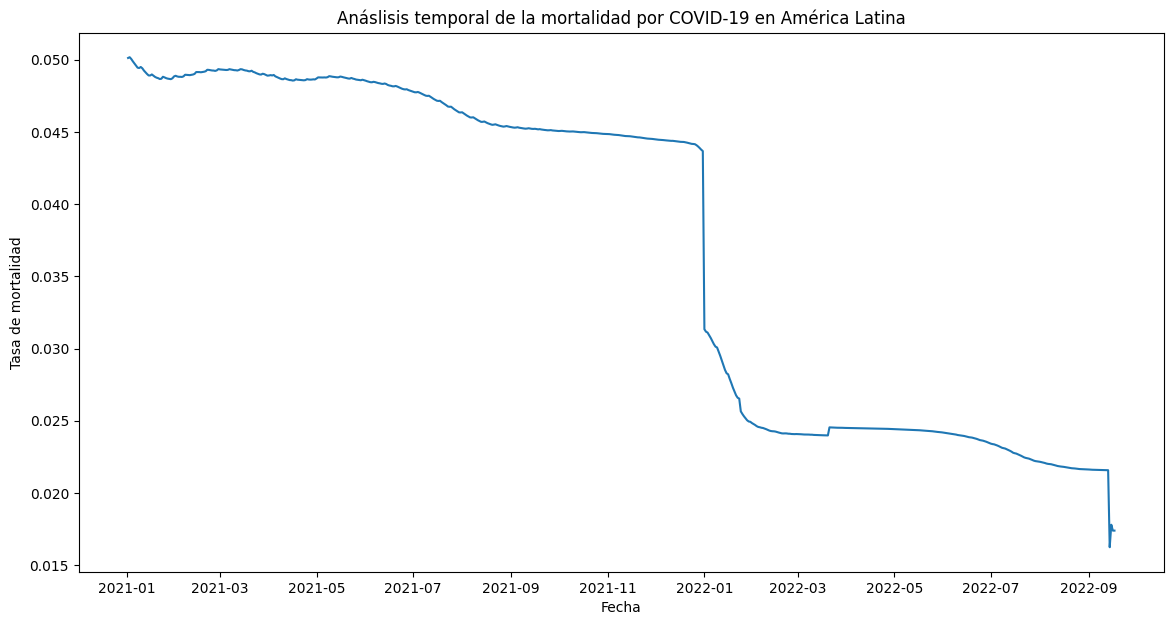

In [109]:
#Como evoluciono la mortalidad

data_latinoamerica_final['mortality_rate']=data_latinoamerica_final['cumulative_deceased']/data_latinoamerica_final['cumulative_confirmed']
plt.figure(figsize=(14,7))
sns.lineplot(data=data_latinoamerica_final,x='date',y='mortality_rate',estimator='mean',ci=None)
plt.title('Anáslisis temporal de la mortalidad por COVID-19 en América Latina')
plt.xlabel('Fecha')
plt.ylabel('Tasa de mortalidad')
plt.show()

Muestra lo esperado en cuanto a lo dicho anteriormente, mientras la politica de vacunación va en aumento la reducción de mortalidad es evidente, se refleja al inicio del 2022 donde la dosis ya se econtraban más o menos en su parte media de crecimiento que la reducción de mortalidad fue bastante fuerte.

C:\Users\rikrd\AppData\Local\Temp\ipykernel_10296\51835043.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  sns.lineplot(data=data_latinoamerica_final.resample('M').mean(numeric_only=True),x='date',y='active_cases',label='Casos activos')
C:\Users\rikrd\AppData\Local\Temp\ipykernel_10296\51835043.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  sns.lineplot(data=data_latinoamerica_final.resample('M').mean(numeric_only=True),x='date',y='cumulative_recovered',label='Casos recuperados')


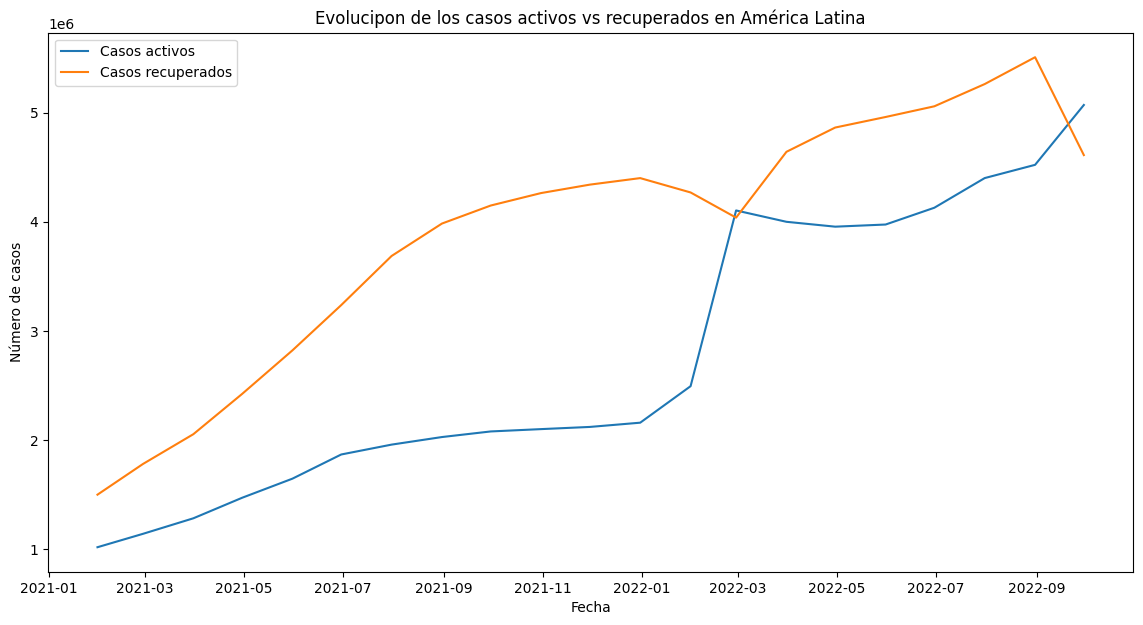

In [110]:
# Como evolucionan los casos activos vs recuperados en América Latina

data_latinoamerica_final['active_cases']=data_latinoamerica_final['cumulative_confirmed']-data_latinoamerica_final['cumulative_deceased']-data_latinoamerica_final['cumulative_recovered']
plt.figure(figsize=(14,7))
sns.lineplot(data=data_latinoamerica_final.resample('M').mean(numeric_only=True),x='date',y='active_cases',label='Casos activos')
sns.lineplot(data=data_latinoamerica_final.resample('M').mean(numeric_only=True),x='date',y='cumulative_recovered',label='Casos recuperados')

plt.xlabel('Fecha')
plt.ylabel('Número de casos')
plt.title('Evolucipon de los casos activos vs recuperados en América Latina')
plt.legend()
plt.show()


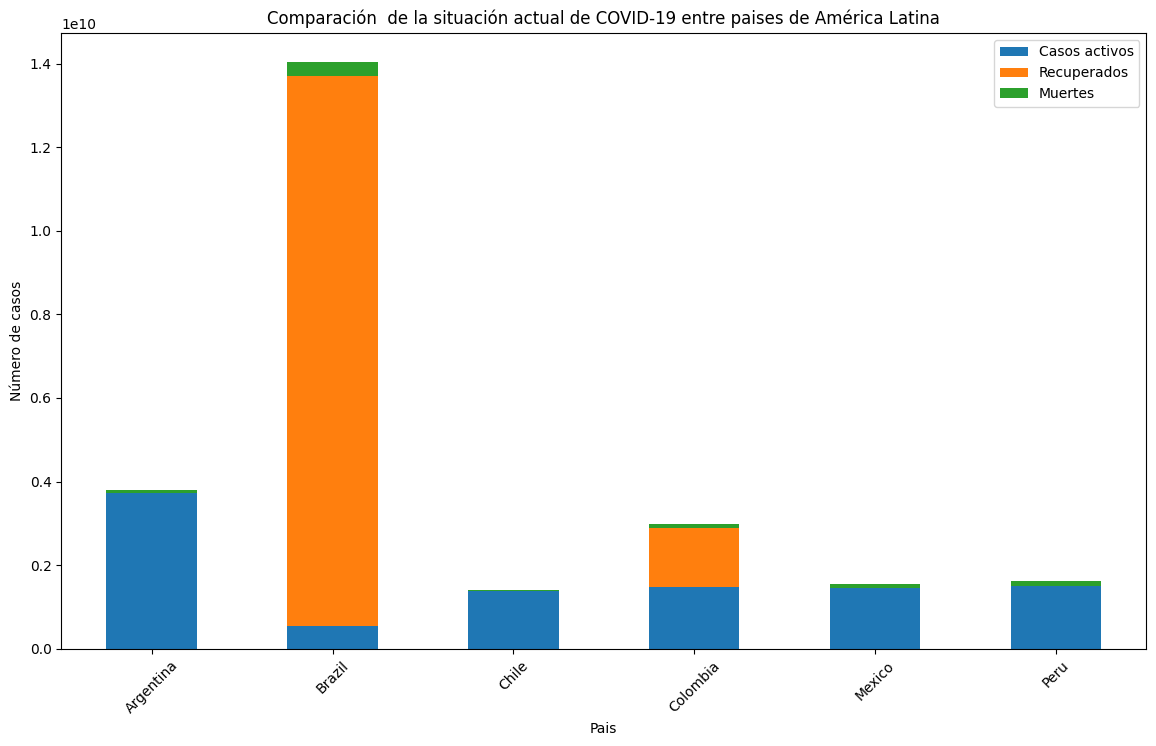

In [112]:
# Comparación  de la situación actual de COVID-19 entre paises de América Latina

current_situation=data_latinoamerica_final.groupby('country_name').sum()[['active_cases','cumulative_recovered','cumulative_deceased']]
current_situation.plot(kind='bar',stacked=True,figsize=(14,8))
plt.xlabel('Pais')
plt.ylabel('Número de casos')
plt.legend(['Casos activos','Recuperados','Muertes'])
plt.title('Comparación  de la situación actual de COVID-19 entre paises de América Latina')
plt.xticks(rotation=45)
plt.show()

Esta gráfica muestra un dato curioso y es que Brasil tiene en estos momentos la situación actual mucho mejor que el resto de paises inclusive teniendo una población mucho más grande que el resto.
Según esste dato Argentina al ser el pais con mayor número de casos activos seria un punto ideal para tener un nuevo laboratorio.